### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

# Initial Observations of Data

Key observations:
- Data is originally inconsistent due to variations in practices approaches to appointment management
- The provided datasets have undergone cleaning (dropped unnecessary columns) to ensure manageability
- Variations in data entry methods, appointment modes, and regional variations could still affect data
consistency and should be accounted for when analysing results 

Key fields that are relevant to analysis:
- appointment_status: Missed appointment analysis, utilisation trends
- appointment_mode: Trends by appointment settings 
- actual_duration: Understand resource utilisation, how long appointments last 
- context_type: Identify which appointments directly involve patients
- national_category: Analyse appointment distribution by purpose/type
- service_setting: Explore which service settings are over/under-utilised 
- hcp_type: Assess which professionals are attending most appointments
- time_between_book_and_appointment: Analyse wait times and potential capacity issues
- appointment_date: Useful for time-series analysis (daily/weekly/monthly appointment trends)
- appointment_month: Identify monthly and seasonal trends
- count_of_appointments: Core metric for answering most questions, including resource utilisation and capacity assessment 

Challenges:
- Data Quality Issues: Variations across practices, missing values and incorrect or inconsistent mappings 
may affect accuracy. Specific fields, such as actual_duration, hcp_type and appointment_mode contain known
missing or misclassified data
- Aggregated Data: Some fields are reported as aggregates (daily, monthly)

Opportunities:
- Missed appointments: Analysing appointment_status can help identify patterns in DNA(Did Not Attend) 
appointments and factors contributing to missed visits
- Time Series Analysis: By leveraging appointment_date and appointment_month, can explore seasonal and 
regional trends to provide actionable recommendations
- Utilisation insights: Combining fields like actual_duration, hcp_type, and appointment status can provide 
a comprehensive view of how resources are allocated 

Potential Cleaning Steps:
- Handling Missing Values: Fields like appointment_status, actual_duration and appointment_mode need to be 
carefully addressed to avoid biased values
- Date formatting: Convert appointment_date and appointment_month into proper date-time formats for
time-series analysis 
- Consistent categories: Normalise and clean  fields like hcp_type and service_setting to account for 
inconsistent mappings
- Subsetting data: For specific analyses, subset the data by service_setting or context_type when needed 

# 1. Data Preparation and Cleaning

In this section, the datasets undergo preprocessing to ensure consistency for further analysis. This involves checking for null values, date formatting, etc. 

In [935]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

### Actual Duration Dataset

In [38]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame.
ad

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439


In [16]:
# Determine whether there are missing values in ad.
ad.isnull().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

In [18]:
# Determine the metadata of the ad data set.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [89]:
# Convert 'appointment_date' to datetime format for analysis
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'], format='%d-%b-%y')

In [91]:
# Determine the descriptive statistics of the ad data set.
ad.describe()

,appointment_date,count_of_appointments
count,137793,137793.000000
mean,2022-03-16 19:31:17.868977664,1219.080011
min,2021-12-01 00:00:00,1.000000
25%,2022-01-25 00:00:00,194.000000
50%,2022-03-16 00:00:00,696.000000
75%,2022-05-09 00:00:00,1621.000000
max,2022-06-30 00:00:00,15400.000000
std,NaN,1546.902956


Note: For appointment date, the mean aligns with the median, indicating that there is no extreme biases in the months. 

For count of appointments, the mean(1219) is much higher than the median(696), indicating a right-skewed distribution.

In addition, the standard deviation (1546.9) is larger than the mean, suggesting high dispersion in the data.

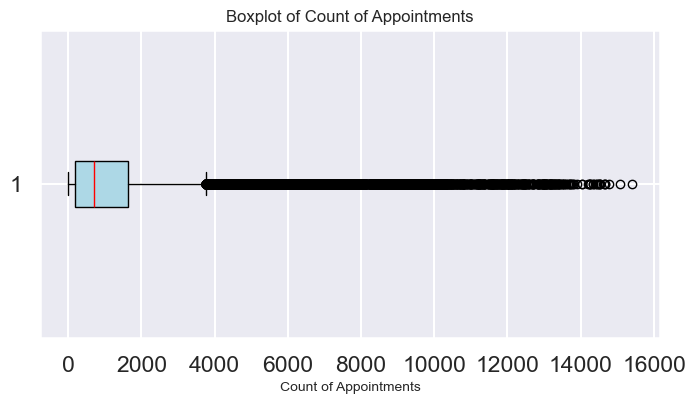

In [687]:
# Create a boxplot for the count_of_appointments column to view outliers
plt.figure(figsize=(8, 4))
plt.boxplot(ad['count_of_appointments'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor="lightblue"), medianprops=dict(color="red"))

# Set labels and title
plt.title("Boxplot of Count of Appointments", fontsize = 12)
plt.xlabel("Count of Appointments", fontsize = 10)

# Show the plot
plt.show()

Note: Majority of appointment counts are relatively low, but there are some locations or time periods 
with extremely high appointment numbers, which could represent overworked staff or peak time surges. It
would be useful to segment the data by month or location.

In [103]:
# Check for duplicates based on key attributes
print(ad.duplicated(subset=['sub_icb_location_code', 'appointment_date', 'actual_duration']).sum())

0


Note: Each combination of sub icb location, date and actual duration category should be unique. 

## Appointments Regional Dataset

In [22]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [24]:
# Determine whether there are missing values in ar.
ar.isnull().sum()

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

In [26]:
# Determine the metadata of the ar data set.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [85]:
# Convert 'appointment_month' to datetime format for analysis
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'], format='%Y-%m')

In [83]:
# Determine the descriptive statistics of the ar data set.
ar.describe()

,appointment_month,count_of_appointments
count,596821,596821.000000
mean,2021-03-19 11:31:17.489565696,1244.601857
min,2020-01-01 00:00:00,1.000000
25%,2020-08-01 00:00:00,7.000000
50%,2021-04-01 00:00:00,47.000000
75%,2021-11-01 00:00:00,308.000000
max,2022-06-01 00:00:00,211265.000000
std,NaN,5856.887042


Note: For appointment month, the mean closely aligns with the median, indicating a fairly even distribution of appointments over time. 

For count of appointments, data is extremely skewed. The median (47) vs mean (1244) indicates that most locations have very
low appointment counts, but a few locations have extremely high counts. Some NHS locations are overloaded,
while others might be underutilised. Further analysis should segment by region.

In [253]:
# Check for duplicates based on key attributes
print(ar.duplicated(subset=['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type', 
                            'appointment_mode','time_between_book_and_appointment']).sum())

301129


In [255]:
duplicates = ar[ar.duplicated(subset=['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type', 
                                      'appointment_mode', 'time_between_book_and_appointment'], keep=False)]
duplicates.head(20) # Show first 20 duplicate rows

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
13221,E54000044,2020-01-01,Attended,GP,Face-to-Face,1 Day,7718
13222,E54000044,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,10605
13223,E54000044,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,22218
13224,E54000044,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,7922
13225,E54000044,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,13754
13226,E54000044,2020-01-01,Attended,GP,Face-to-Face,More than 28 Days,7041
13227,E54000044,2020-01-01,Attended,GP,Face-to-Face,Same Day,48500
13228,E54000044,2020-01-01,Attended,GP,Face-to-Face,Unknown / Data Quality,3
13229,E54000044,2020-01-01,Attended,GP,Home Visit,1 Day,227
13230,E54000044,2020-01-01,Attended,GP,Home Visit,15 to 21 Days,18


Note: Duplicates are not actual duplicates as they differ by time between book and appointment. Thus, we 
will not be dropping any duplicates. 

**Additional Dataset:** Here, we will be importing a dataset containing ICB Code and their respective name, to be merged together with the ar dataset.  This dataset is downloaded from https://geoportal.statistics.gov.uk/documents/25ba241a775e4a9db8e5c721ee73d85d/about

In [825]:
# Import icb_code dataset 
# The column names were edited on Excel before importing
icb_code = pd.read_csv('ICB_JUL_2022_EN_NC.csv')

# View the dataframe
icb_code.head()

,icb_ons_code,ICB22CDH,icb_ons_name
0,E54000008,QYG,NHS Cheshire and Merseyside Integrated Care Board
1,E54000010,QNC,NHS Staffordshire and Stoke-on-Trent Integrated Care Board
2,E54000011,QOC,"NHS Shropshire, Telford and Wrekin Integrated Care Board"
3,E54000013,QJM,NHS Lincolnshire Integrated Care Board
4,E54000015,QK1,"NHS Leicester, Leicestershire and Rutland Integrated Care Board"


In [829]:
# Merge the icb_code dataset onto the ar dataset using a left join
ar_updated = ar.merge(icb_code, on='icb_ons_code', how = 'left')

# View the new dataframe 
ar_updated.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,season,ICB22CDH,icb_ons_name
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107,Winter,QNQ,NHS Frimley Integrated Care Board
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791,Winter,QNQ,NHS Frimley Integrated Care Board
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686,Winter,QNQ,NHS Frimley Integrated Care Board
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268,Winter,QNQ,NHS Frimley Integrated Care Board
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971,Winter,QNQ,NHS Frimley Integrated Care Board


## National Categories Dataset

In [67]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [71]:
# Determine whether there are missing values in nc.
nc.isnull().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

In [77]:
# Determine the metadata of the nc data set.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [79]:
# Determine the descriptive statistics of the nc data set.
nc.describe()

,appointment_date,count_of_appointments
count,817394,817394.000000
mean,2022-01-16 00:50:35.860796160,362.183684
min,2021-08-01 00:00:00,1.000000
25%,2021-10-25 00:00:00,7.000000
50%,2022-01-18 00:00:00,25.000000
75%,2022-04-07 00:00:00,128.000000
max,2022-06-30 00:00:00,16590.000000
std,NaN,1084.576600


Note: Similar trends to Actual Duration and Appointments Regional Dataset. 

In [257]:
# Check for duplicates based on key attributes
print(nc.duplicated(subset=['appointment_date', 'icb_ons_code', 'sub_icb_location_name', 'service_setting', 
                            'national_category']).sum())

0


In [40]:
#View the total number of rows and column for the 3 datasets
print('Actual Duration Dataset:', ad.shape)
print('Appointments Regional Dataset:', ar.shape)
print('National Categories Dataset:',nc.shape)

Actual Duration Dataset: (137793, 8)
Appointments Regional Dataset: (596821, 7)
National Categories Dataset: (817394, 8)


### Explore the data set

**Question 1:** How many locations are there in the data set?

**Answer:** The NHS dataset is divided into 7 regions, 42 ICB locations, and 106 sub-ICB locations.  

In [175]:
# Determine the number of locations using the nunique() function.
print('Number of regions:', ad['region_ons_code'].nunique())
print('Number of ICB locations:', ad['icb_ons_code'].nunique())
print('Number of sub-ICB locations:', ad['sub_icb_location_ons_code'].nunique())

Number of regions: 7
Number of ICB locations: 42
Number of sub-ICB locations: 106


**Question 2:** What are the five locations with the highest number of appointments?



**Answer:** The top 5 sub-ICB locations are North West London, North East London, Kent and Medway,
Hampshire and Isle of Wight, and South East London. 

In [265]:
# Determine the top five locations based on nc record count.
top_5_locations_nc = nc.groupby('sub_icb_location_name')['count_of_appointments'].sum().sort_values(ascending=False).head(5).reset_index()
top_5_locations_nc.columns = ['Sub ICB Locations', 'Count of Appointments in nc']
top_5_locations_nc

,Sub ICB Locations,Count of Appointments in nc
0,NHS North West London ICB - W2U3Z,12142390
1,NHS North East London ICB - A3A8R,9588891
2,NHS Kent and Medway ICB - 91Q,9286167
3,NHS Hampshire and Isle Of Wight ICB - D9Y0V,8288102
4,NHS South East London ICB - 72Q,7850170


In [251]:
# Determine the top five locations based on ad record count.
top_5_locations_ad = ad.groupby('sub_icb_location_name')['count_of_appointments'].sum().sort_values(ascending=False).head(5).reset_index()
top_5_locations_ad.columns = ['Sub ICB Locations', 'Count of Appointments in ad']
top_5_locations_ad

,Sub ICB Locations,Count of Appointments in ad
0,NHS North West London ICB - W2U3Z,6976986
1,NHS North East London ICB - A3A8R,5341883
2,NHS Kent and Medway ICB - 91Q,5209641
3,NHS Hampshire and Isle Of Wight ICB - D9Y0V,4712737
4,NHS South East London ICB - 72Q,4360079


Note: London based ICBs dominate the top 5. This could reflect higher population density or higher
healthcare demand in urban areas. This is consistent in both nc and ad datasets.

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

**Answer:** There are 5 service settings, with General Practice being the most commonly available.

In [213]:
# Determine the number of service settings.
service_settings = nc['service_setting'].value_counts().reset_index()
service_settings.columns = ['Service Setting', 'Count of Records']
service_settings

,Service Setting,Count of Records
0,General Practice,359274
1,Primary Care Network,183790
2,Other,138789
3,Extended Access Provision,108122
4,Unmapped,27419


Note: While GPs handle most appointments, PCN also plays an important role. Extended Access Provision
is also important, meaning many patients need care outside standard working hours. 

Unmapped data occupies a large proportion of data, and should be addressed.

In [215]:
# Determine the number of context types.
context_types = nc['context_type'].value_counts().reset_index()
context_types.columns = ['Context Type', 'Count of Records']
context_types

,Context Type,Count of Records
0,Care Related Encounter,700481
1,Inconsistent Mapping,89494
2,Unmapped,27419


**Answer:** There are 3 context types, with Care Related Encounter being the most commonly available.

In [217]:
# Determine the number of national categories.
national_categories = nc['national_category'].value_counts().reset_index()
national_categories.columns = ['National Category', 'Count of Records']
national_categories

,National Category,Count of Records
0,Inconsistent Mapping,89494
1,General Consultation Routine,89329
2,General Consultation Acute,84874
3,Planned Clinics,76429
4,Clinical Triage,74539
5,Planned Clinical Procedure,59631
6,Structured Medication Review,44467
7,Service provided by organisation external to t...,43095
8,Home Visit,41850
9,Unplanned Clinical Activity,40415


**Answer:** There are 18 national categories in the dataset. However, a majority of records indicate
Inconsistent Mapping.

Note: A large portion of records are not mapped properly, reducing data reliability. The General Consultation Routine and Acute are the most common appointment types, indicating that they are core NHS 
services. 

Home Visits and Care Home Services indicate demand for at-home or elderly patient care. 

Walk-in Appointments are low compared to scheduled services, suggesting that patients rely more on 
scheduled appointments. This also shows a good sign of system efficiency.

Group Consultation and Group Education is the least used category, indicating that group healthcare programs are not widely adopted. 

In [219]:
# Determine the number of appointment statuses.
appointment_statuses = ar['appointment_status'].value_counts().reset_index()
appointment_statuses.columns = ['Appointment Status', 'Count of Records']
appointment_statuses

,Appointment Status,Count of Records
0,Attended,232137
1,Unknown,201324
2,DNA,163360


**Answer:** There are 3 types of appointment status. The number of unknown records and attended records 
are almost the same, indicating that there is a high proportion of Unknown data. 

Note: A high number of appointments have an Unknown status, which could indicate data quality issues or 
missing updates. Over 160k appointments were missed, leading to potential inefficiencies and financial
losses for the NHS. A breakdown of DNA rates by region or service type could reveal where missed appointments are most common. 

#### Data Quality Considerations: High proportion of missing and unmapped data 

A significant proportion of appointment records contain 'Unmapped' or 'Inconsistent Mapping' values. These likely stem from variations in data entry across NHS systems rather than actual missing appointments. While this does not affect high-level trends, it may limit the accuracy of more granular analyses, such as specific service settings or regional insights. 

Given the large scale of the dataset and the lack of a reliable way to accurately reclassify these entries, no adjustments have been made. Instead, these inconsistencies are acknowledged as a limitation, and recommendations for improving NHS data quality are provided. See Appendix X for a more detailed breakdown of data inconsistencies.

#### Assumptions Moving Forward

1. "Unknown" or "Unmapped" values are due to inconsistencies in data entry, not actual missing appointments.

NHS Digital acknowledges that data in general practice appointments contains quality issues due to variations in recording methods across practices. 

2. Assumption: Regional data inconsistencies are due to NHS reporting variations, not actual service issues.

NHS Digital points out that data quality issues stem from variations in working methods and recording between different practices and Primary Care Networks (PCNs).

3. Assumption: Despite missing data, general trends in appointment volume and utilization are still valid.

NHS England emphasizes the importance of improving data quality to better reflect actual activity, suggesting that current data, despite its issues, is used to understand trends. 

Source for Assumption 1-3: https://digital.nhs.uk/data-and-information/publications/statistical/appointments-in-general-practice/appointments-in-general-practice-supporting-information

4. Assumption: Historical data is representative of current and future NHS trends. However, external factors such as policy changes may impact future predictions. Trends should be interpreted with consideration of these factors.

The Health Foundation discusses how better use of routine health data can address current challenges, implying that historical data is valuable for understanding and predicting trends. 

Source: https://www.health.org.uk/reports-and-analysis/briefings/how-better-use-of-data-can-help-address-key-challenges-facing-the


# 2. Further Data Exploration

In this section, we get a better understanding of the datasets that we have, and obtain some preliminary information.

**Question 1:** Between what dates were appointments scheduled? 

**Answer:** 
- In ad, appointments run from 1 Dec 2021 to 30 Jun 2022 (7 months)
- In nc, appointments run from 1 August 2021 to 30 Jun 2022 (11 months)
- In ar, appointments run from Jan 2020 to June 2022 (30 months)  

In [74]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad['appointment_date'].head()

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object

In [76]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc['appointment_date'].head()

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [82]:
# View the first five rows of appointment_month for the ar DataFrame to determine the date format.
ar['appointment_month'].head()

0    2020-01
1    2020-01
2    2020-01
3    2020-01
4    2020-01
Name: appointment_month, dtype: object

In [293]:
# Change the date format of ad['appointment_date'] for further analysis.
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View the DateFrame.
ad['appointment_date']

0        2021-12-01
1        2021-12-01
2        2021-12-01
3        2021-12-01
4        2021-12-01
            ...    
137788   2022-06-30
137789   2022-06-30
137790   2022-06-30
137791   2022-06-30
137792   2022-06-30
Name: appointment_date, Length: 137793, dtype: datetime64[ns]

In [295]:
# Change the date format of ar['appointment_month'] for further analysis.
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'], format = '%Y-%m')

# View the DateFrame.
ar['appointment_month'] 

0        2020-01-01
1        2020-01-01
2        2020-01-01
3        2020-01-01
4        2020-01-01
            ...    
596816   2022-06-01
596817   2022-06-01
596818   2022-06-01
596819   2022-06-01
596820   2022-06-01
Name: appointment_month, Length: 596821, dtype: datetime64[ns]

In [297]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
ad_min_date = ad['appointment_date'].min()
ad_max_date = ad['appointment_date'].max()
print("Minimum Date in ad:", ad_min_date)
print("Maximum Date in ad:",ad_max_date)

Minimum Date in ad: 2021-12-01 00:00:00
Maximum Date in ad: 2022-06-30 00:00:00


In [299]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
nc_min_date = nc['appointment_date'].min()
nc_max_date = nc['appointment_date'].max()
print("Minimum Date in nc:",nc_min_date)
print("Maximum Date in nc:",nc_max_date)

Minimum Date in nc: 2021-08-01 00:00:00
Maximum Date in nc: 2022-06-30 00:00:00


In [301]:
# Determine the minimum and maximum dates in the ar DataFrame.
# Use appropriate docstrings.
ar_min_date = ar['appointment_month'].min()
ar_max_date = ar['appointment_month'].max()
print("Minimum Date in ar:",ar_min_date)
print("Maximum Date in ar:",ar_max_date)

Minimum Date in ar: 2020-01-01 00:00:00
Maximum Date in ar: 2022-06-01 00:00:00


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

**Answer:** General Practice was the most popular service setting for NHS North West London from 
1 January to 1 June 2022.

In [305]:
# For each of these service settings, determine the number of records available for the period and the location. 
nc_subset = nc[( nc['appointment_date'] >= '2022-01-01') &
               ( nc['appointment_date'] <= '2022-06-01') &
               ( nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z')]

# View the output.
nc_service_settings_popularity = nc_subset['service_setting'].value_counts().reset_index()
nc_service_settings_popularity.columns = ['Service Setting','Count of Records']
nc_service_settings_popularity

,Service Setting,Count of Records
0,General Practice,2104
1,Other,1318
2,Primary Care Network,1272
3,Extended Access Provision,1090
4,Unmapped,152


**Question 3:** Which month had the highest number of appointments?

**Answer:** November 2021 had the highest number of appointments, which is consistent in nc and ar datasets. This is likely due to the Covid 19 Booster Vaccination Campaign by the NHS, which invited
many people to book their booster jab (Source: https://www.england.nhs.uk/2021/11/record-breaking-week-for-nhs-covid-19-booster-jabs/)

The ad dataset only covers 7 months and is thus not suitable for monthly appointment trend.

In [320]:
# Number of appointments per month == sum of count_of_appointments by month in nc.
# Use the groupby() and sort_values() functions.
highest_appointments_nc = nc.groupby('appointment_month')['count_of_appointments'].sum().sort_values(ascending=False).reset_index()
highest_appointments_nc.columns = ['Appointment Month', 'Count of Appointments in nc']
highest_appointments_nc.head()

,Appointment Month,Count of Appointments in nc
0,2021-11,30405070
1,2021-10,30303834
2,2022-03,29595038
3,2021-09,28522501
4,2022-05,27495508


In [322]:
# Number of appointments per month == sum of count_of_appointments by month in ar.
# Use the groupby() and sort_values() functions.
highest_appointments_ar = ar.groupby('appointment_month')['count_of_appointments'].sum().sort_values(ascending=False).reset_index()
highest_appointments_ar.columns = ['Appointment Month', 'Count of Appointments in ar']
highest_appointments_ar.head()

,Appointment Month,Count of Appointments in ar
0,2021-11-01,30405070
1,2021-10-01,30303834
2,2022-03-01,29595038
3,2021-09-01,28522501
4,2020-10-01,28301932


**Question 4:** What was the total number of records per month?

In [341]:
# Total number of records per month in nc.
nc_records_per_month = nc['appointment_month'].value_counts().reset_index()
nc_records_per_month.columns = ['Appointment Month', 'Count of Records in nc']
nc_records_per_month = nc_records_per_month.sort_values(by='Appointment Month', ascending=True)
nc_records_per_month

,Appointment Month,Count of Records in nc
10,2021-08,69999
3,2021-09,74922
5,2021-10,74078
1,2021-11,77652
6,2021-12,72651
7,2022-01,71896
8,2022-02,71769
0,2022-03,82822
9,2022-04,70012
2,2022-05,77425


In [343]:
# Total number of records per month in ar.
ar_records_per_month = ar['appointment_month'].value_counts().reset_index()
ar_records_per_month.columns = ['Appointment Month', 'Count of Records in ar']
ar_records_per_month = ar_records_per_month.sort_values(by='Appointment Month', ascending=True)
ar_records_per_month

,Appointment Month,Count of Records in ar
1,2020-01-01,20889
3,2020-02-01,20689
0,2020-03-01,21350
26,2020-04-01,19124
29,2020-05-01,18338
28,2020-06-01,18844
19,2020-07-01,19502
25,2020-08-01,19247
14,2020-09-01,20043
12,2020-10-01,20122


In [345]:
# Total number of records per month in ad.
ad['month_year'] = ad['appointment_date'].dt.to_period('M')
ad_records_per_month = ad['month_year'].value_counts().reset_index()
ad_records_per_month.columns = ['Appointment Month', 'Count of Records in ad']
ad_records_per_month = ad_records_per_month.sort_values(by='Appointment Month', ascending=True)
ad_records_per_month

,Appointment Month,Count of Records in ad
3,2021-12,19507
2,2022-01,19643
6,2022-02,18974
0,2022-03,21236
5,2022-04,19078
1,2022-05,20128
4,2022-06,19227


# 3. Monthly and Seasonal Trends in Data

In this section, we have a look at the monthly and seasonal trends that we can observe from the nc dataset.

In [954]:
# Set figure size.
sns.set(rc={'figure.figsize':(18, 6)})

# Set figure style.
sns.set(style='darkgrid', context='talk',palette='colorblind')

### Monthly Trends of Appointments

**Objective:** Identify overall appointment trends over time. \
**Dataset Choice:** NC dataset covers 11 months, which is sufficient to analyse monthly trends and 
further breakdown into service settings, context types and national categories in the next visualisations.\
**Observations:** The number of appointments fluctuate over time and shows 3 significant spikes, in 
Nov 2021 (which was previously explained by the Covid Booster Programme), March 2022 and May 2022. Upon further investigation, we can see that in Mar 2022, the NHS had a Covid Spring Booster Campaign, and in May 2022, a Equality, Diversity and Human Rights Week which promoted initiatives to encourage individuals from diverse backgrounds to seek medical services.\
**Sources:**  https://www.england.nhs.uk/2022/03/nhs-covid-19-vaccine-programme-delivers-first-spring-boosters/, https://www.nhsemployers.org/articles/equality-diversity-and-human-rights-week-2024) \
**Note:** Page from 2022 is no longer available but NHS conducts the same event every year, thus the source page is  from 2024.

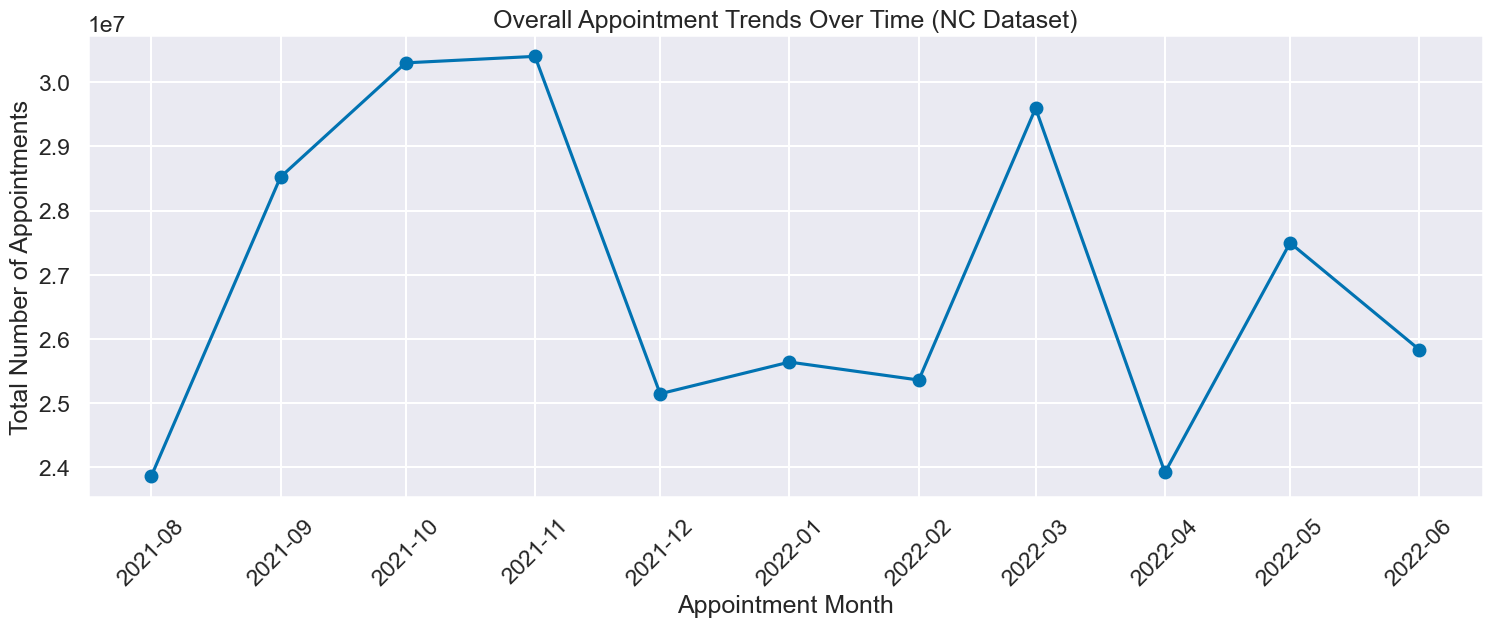

In [691]:
# Group data by appointment month and sum appointments
nc_appointment_trends = nc.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

# Plot the line graph
plt.plot(nc_appointment_trends['appointment_month'], nc_appointment_trends['count_of_appointments'], marker='o')

# Labels and title
plt.xlabel("Appointment Month")
plt.ylabel("Total Number of Appointments")
plt.title("Overall Appointment Trends Over Time (NC Dataset)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Monthly Trends by Service Setting

**Objective:** Compare service setting trends over time \
**Observation:** General Practice consistently has the highest number of appointments, significantly higher than the other service settings. The trend follows a similar pattern to the overall appointment trend. 

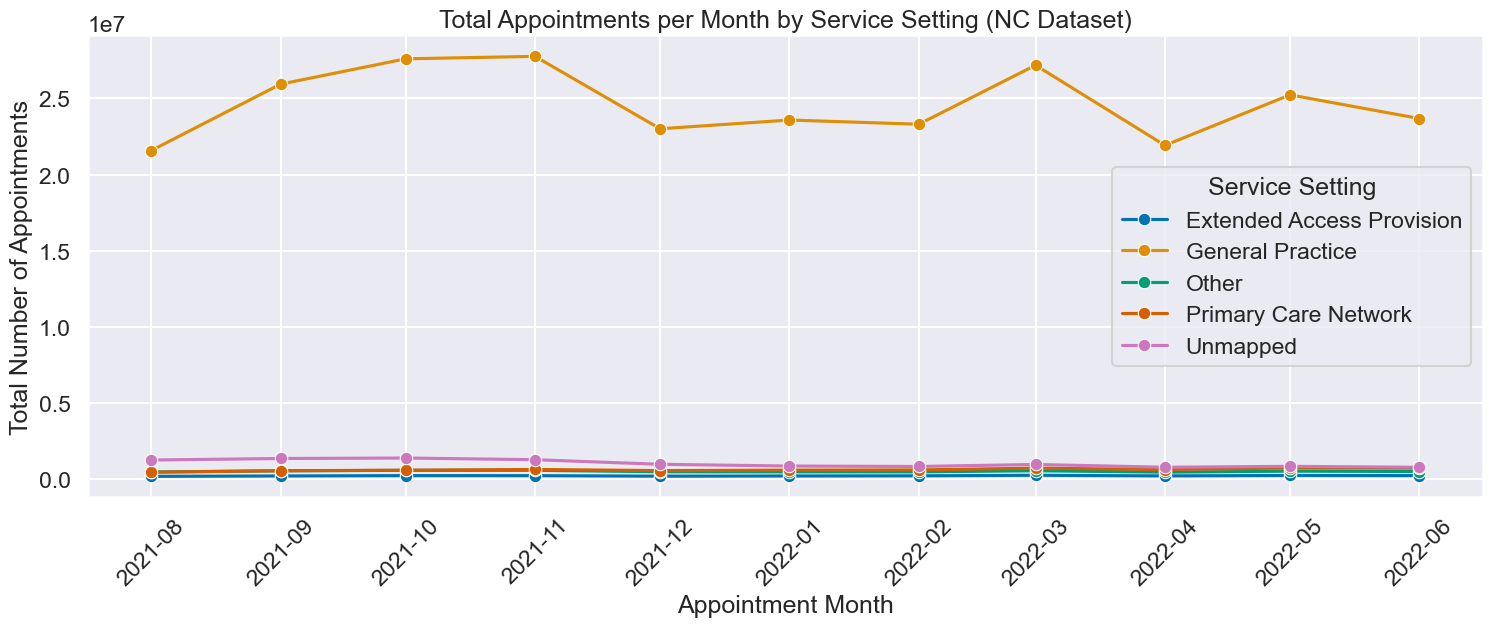

In [693]:
# Group data by month and service setting, summing the count of appointments
nc_service_trends = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Create the line plot for total appointments by service setting
plt.figure()
sns.lineplot(data=nc_service_trends, x='appointment_month', y='count_of_appointments', hue='service_setting', marker='o')
plt.legend(title="Service Setting")

# Labels and title
plt.xlabel("Appointment Month")
plt.ylabel("Total Number of Appointments")
plt.title("Total Appointments per Month by Service Setting (NC Dataset)")
plt.xticks(rotation=45)

# Display the plot
plt.show()

### Monthly Trends by Context Type

**Objective:** Identify monthly patterns in different types of patient interactions. \
**Observation:** Majority of appointments fall under 'Care Related Encounter', which is significantly higher than the other categories. Trend follows overall pattern in previous visualisations. 

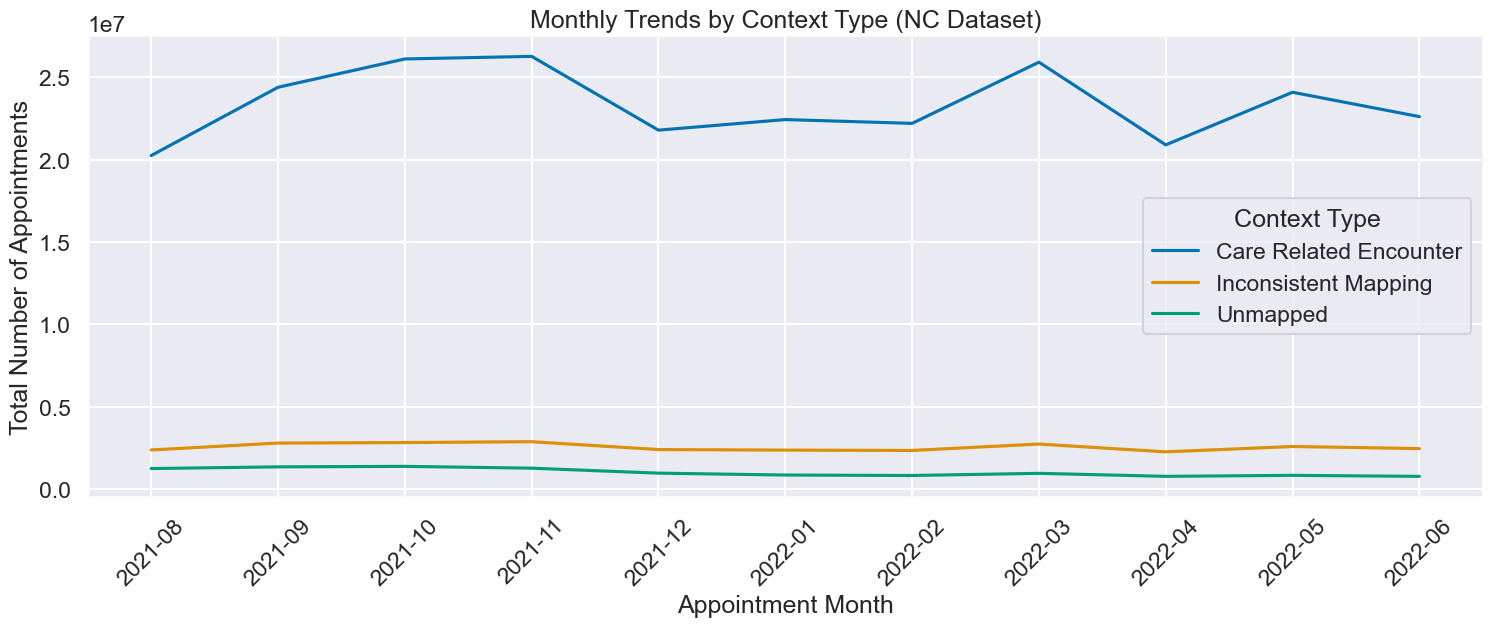

In [956]:
# Group data by month and context type
nc_context_trends = nc.groupby(['appointment_month', 'context_type'])['count_of_appointments'].sum().reset_index()

# Plot line chart
plt.figure()
sns.lineplot(data=context_monthly, x='appointment_month', y='count_of_appointments', hue='context_type')

# Format plot
plt.xticks(rotation=45)
plt.xlabel('Appointment Month')
plt.ylabel('Total Number of Appointments')
plt.title('Monthly Trends by Context Type (NC Dataset)')
plt.legend(title='Context Type')

# Show plot
plt.show()

### Monthly Trend by National Category

**Objective:** Understand shifts in appointment categories \
**Observation:** General Consultation Routine has the highest number of appointments, followed by General Consultation Acute. Trends align with previous charts. Categories like Walk-in, Unplanned Clinical Activity, and Social Prescribing Service have consistently low appointment volumes.

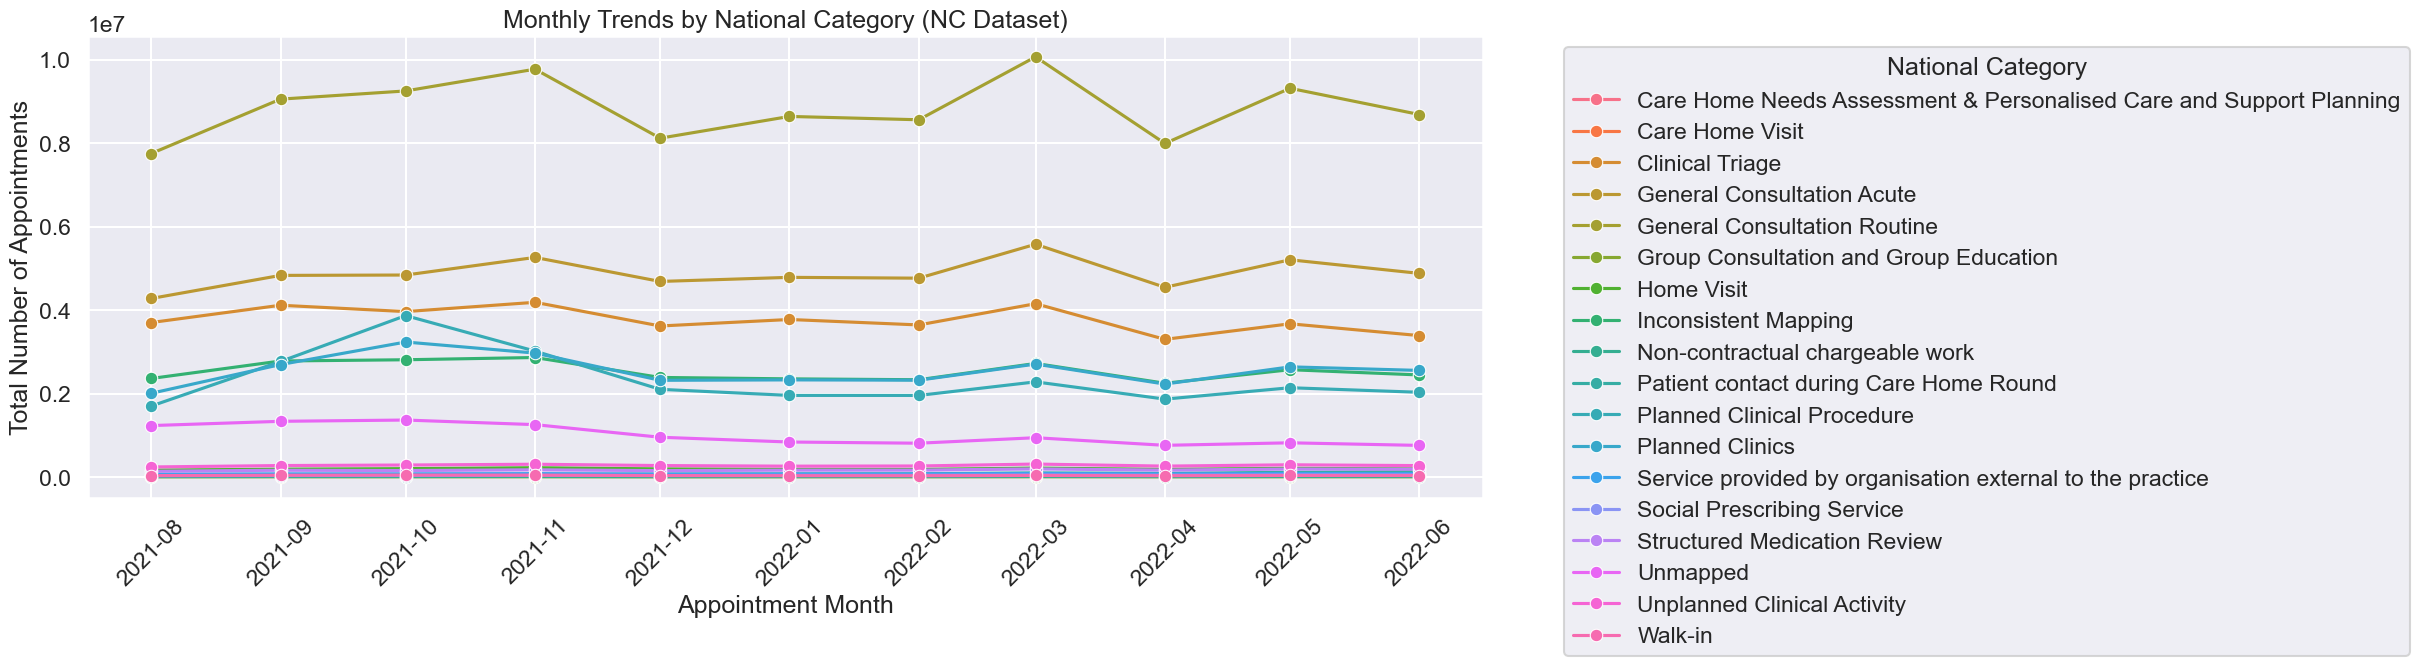

In [697]:
# Aggregate data by appointment_month and national_category
nc_category_trends = nc.groupby(['appointment_month', 'national_category'])['count_of_appointments'].sum().reset_index()

# Plot line chart
sns.lineplot(data=nc_category_trends, x='appointment_month', y='count_of_appointments', hue='national_category', marker="o")

# Labels and title
plt.title("Monthly Trends by National Category (NC Dataset)")
plt.xlabel("Appointment Month")
plt.ylabel("Total Number of Appointments")
plt.xticks(rotation=45)
plt.legend(title="National Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

### Seasonal Trends of Number of Appointments for Service Setting
The seasons are summer (June to August 2021), autumn (September to November 2021), winter (December to February 2022), and spring (March to May 2022).

**Overall Trend of Service Settings by Seasons**

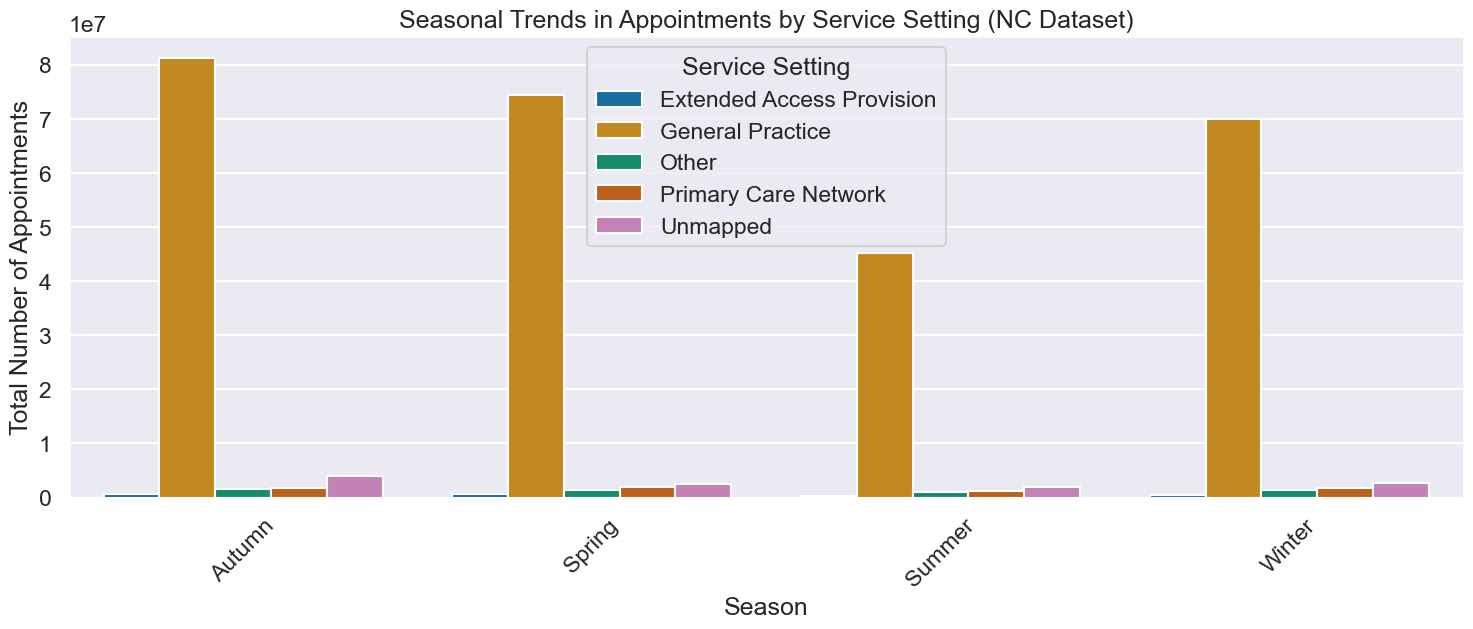

In [699]:
# Convert Appointment Month to datetime for grouping 

nc['appointment_month'] = pd.to_datetime(nc['appointment_month'], format='%Y-%m')

# Define the seasons
season_mapping = {
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn',
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring'
}

# Extract the month and map to season
nc['season'] = nc['appointment_month'].dt.month.map(season_mapping)

# Aggregate total appointments per season per service setting
seasonal_trends_nc = (
    nc.groupby(['season', 'service_setting'])['count_of_appointments']
    .sum()
    .reset_index()
)

# Plot bar chart
sns.barplot(
    data=seasonal_trends_nc, 
    x='season', 
    y='count_of_appointments', 
    hue='service_setting'
)

# Formatting
plt.xlabel("Season")
plt.ylabel("Total Number of Appointments")
plt.title("Seasonal Trends in Appointments by Service Setting (NC Dataset)")
plt.legend(title="Service Setting")
plt.xticks(rotation=45)

# Show plot
plt.show()

**Percentage Distribution of Service Settings by Season**

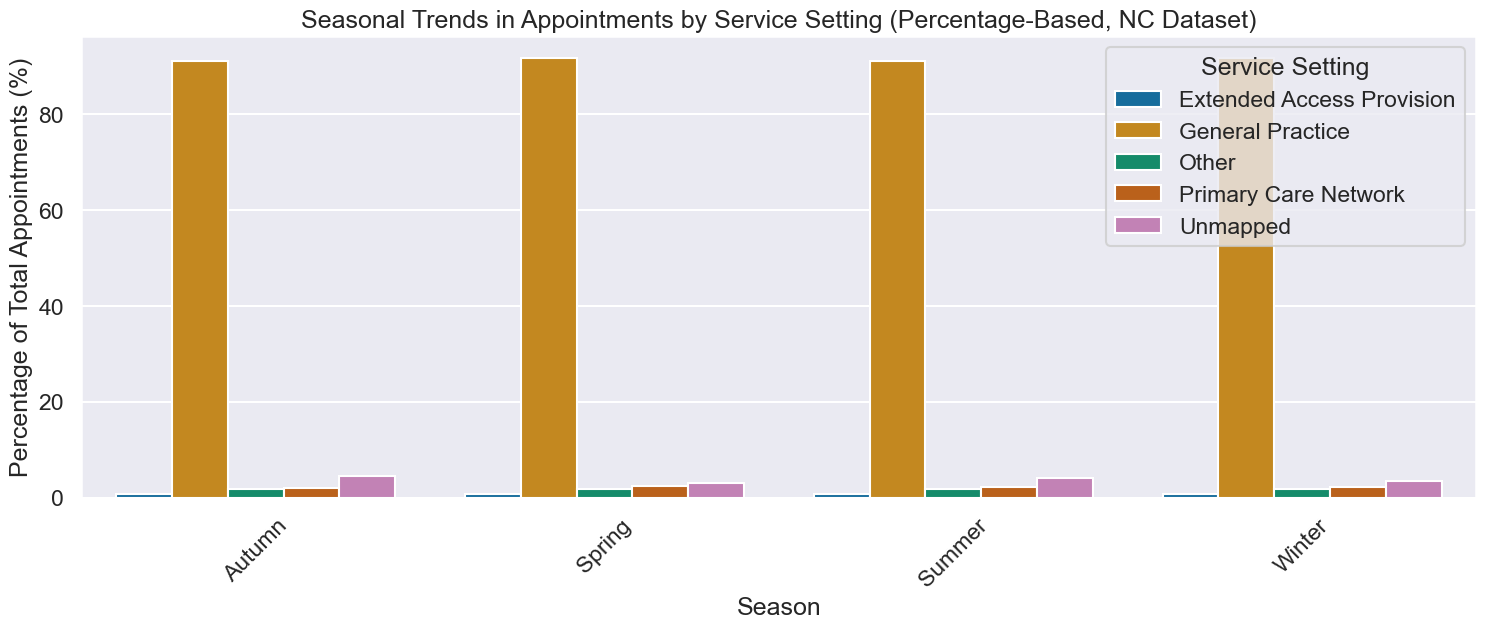

In [701]:
# Calculate the percentage distribution within each season
seasonal_trends_nc['percentage'] = seasonal_trends_nc.groupby('season')['count_of_appointments'].transform(lambda x: (x / x.sum()) * 100)

# Plot the percentage-based grouped bar chart
sns.barplot(
    data=seasonal_trends_nc, 
    x='season', 
    y='percentage', 
    hue='service_setting'
)

# Formatting
plt.xlabel("Season")
plt.ylabel("Percentage of Total Appointments (%)")
plt.title("Seasonal Trends in Appointments by Service Setting (Percentage-Based, NC Dataset)")
plt.legend(title="Service Setting")
plt.xticks(rotation=45)

# Show plot
plt.show()

Moving forward for our daily trend analysis, we will only be looking at General Practice as it consistently accounts for the majority of appointments. 

In [479]:
# Filter dataset for General Practice only
nc_gp_day = nc[nc['service_setting'] == 'General Practice']

# Create a separate dataset for General Practice appointments per day
nc_gp_day = nc_gp_day.groupby(['appointment_month', 'appointment_date', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View output
nc_gp_day.head()

,appointment_month,appointment_date,service_setting,count_of_appointments
0,2021-08-01,2021-08-01,General Practice,3411
1,2021-08-01,2021-08-02,General Practice,1108073
2,2021-08-01,2021-08-03,General Practice,1056435
3,2021-08-01,2021-08-04,General Practice,988285
4,2021-08-01,2021-08-05,General Practice,968191


In [487]:
# Check the date range in the filtered dataset
print(nc_gp_day['appointment_date'].min(), nc_gp_day['appointment_date'].max())

2021-08-01 00:00:00 2022-06-30 00:00:00


**Summer (June to August 2021):**

In [489]:
# Filter for Summer 2021 (August 2021 only, as NC starts from August 2021)
nc_summer_gp = nc_gp_day[nc_gp_day['appointment_month'] == '2021-08-01']

# View output
nc_summer_gp.head()

,appointment_month,appointment_date,service_setting,count_of_appointments
0,2021-08-01,2021-08-01,General Practice,3411
1,2021-08-01,2021-08-02,General Practice,1108073
2,2021-08-01,2021-08-03,General Practice,1056435
3,2021-08-01,2021-08-04,General Practice,988285
4,2021-08-01,2021-08-05,General Practice,968191


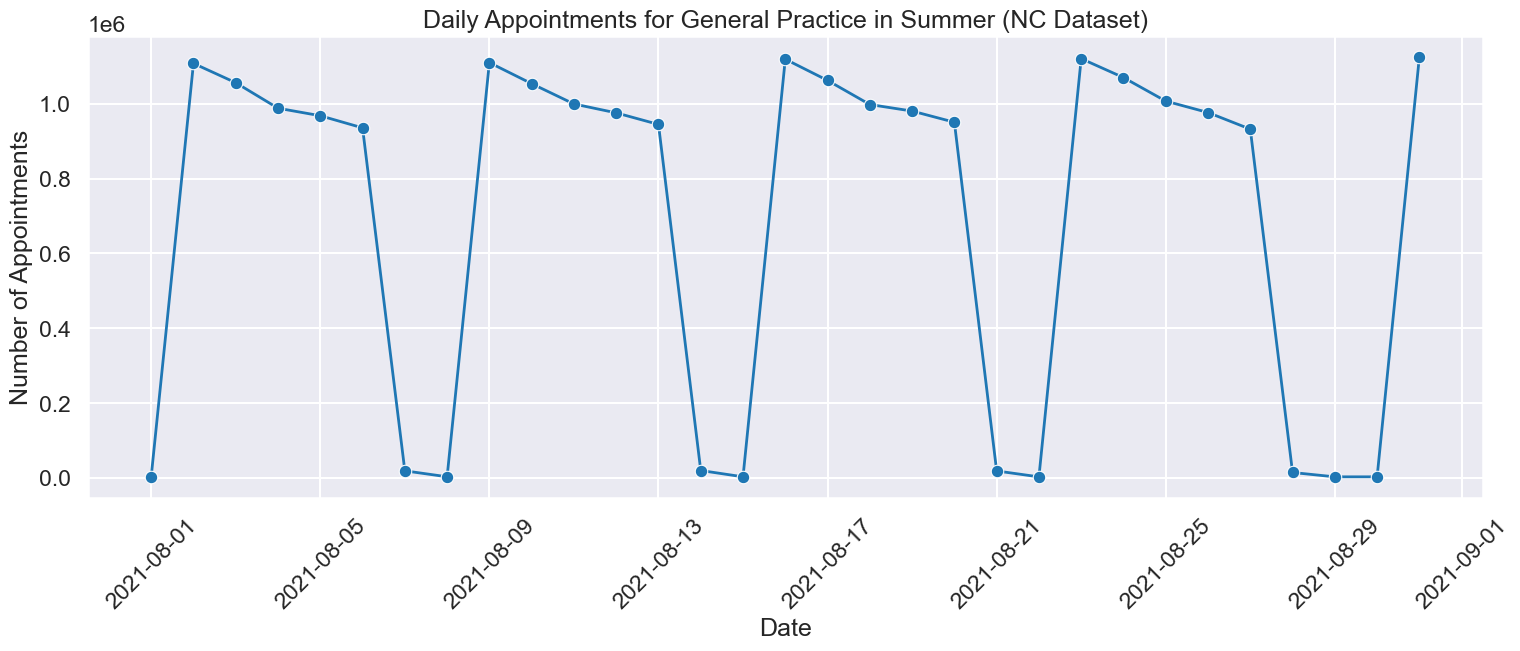

In [703]:
# Create a line plot for General Practice daily trends in August 2021
plt.figure()

sns.lineplot(
    data=nc_summer_gp, 
    x='appointment_date', 
    y='count_of_appointments', 
    marker='o', 
    linewidth=2, 
    color='tab:blue'
)

# Formatting
plt.xlabel("Date")
plt.ylabel("Number of Appointments")
plt.title("Daily Appointments for General Practice in Summer (NC Dataset)")
plt.xticks(rotation=45)

# Show plot
plt.show()

**Observation:** In summer, we can observe a stable trend where the appointments dip on weekends and go back up on Monday. The recurring drops on Sunday are likely due to the NHS General Practice services not operating on Sundays.

**Autumn (September to November 2021):**

In [493]:
# Look at September to November 2021
nc_autumn_gp = nc_gp_day[(nc_gp_day['appointment_month'] >= '2021-09-01') &
                      (nc_gp_day['appointment_month'] <= '2021-11-01')]

nc_autumn_gp.head()

,appointment_month,appointment_date,service_setting,count_of_appointments
31,2021-09-01,2021-09-01,General Practice,1041879
32,2021-09-01,2021-09-02,General Practice,1014376
33,2021-09-01,2021-09-03,General Practice,988674
34,2021-09-01,2021-09-04,General Practice,18543
35,2021-09-01,2021-09-05,General Practice,3017


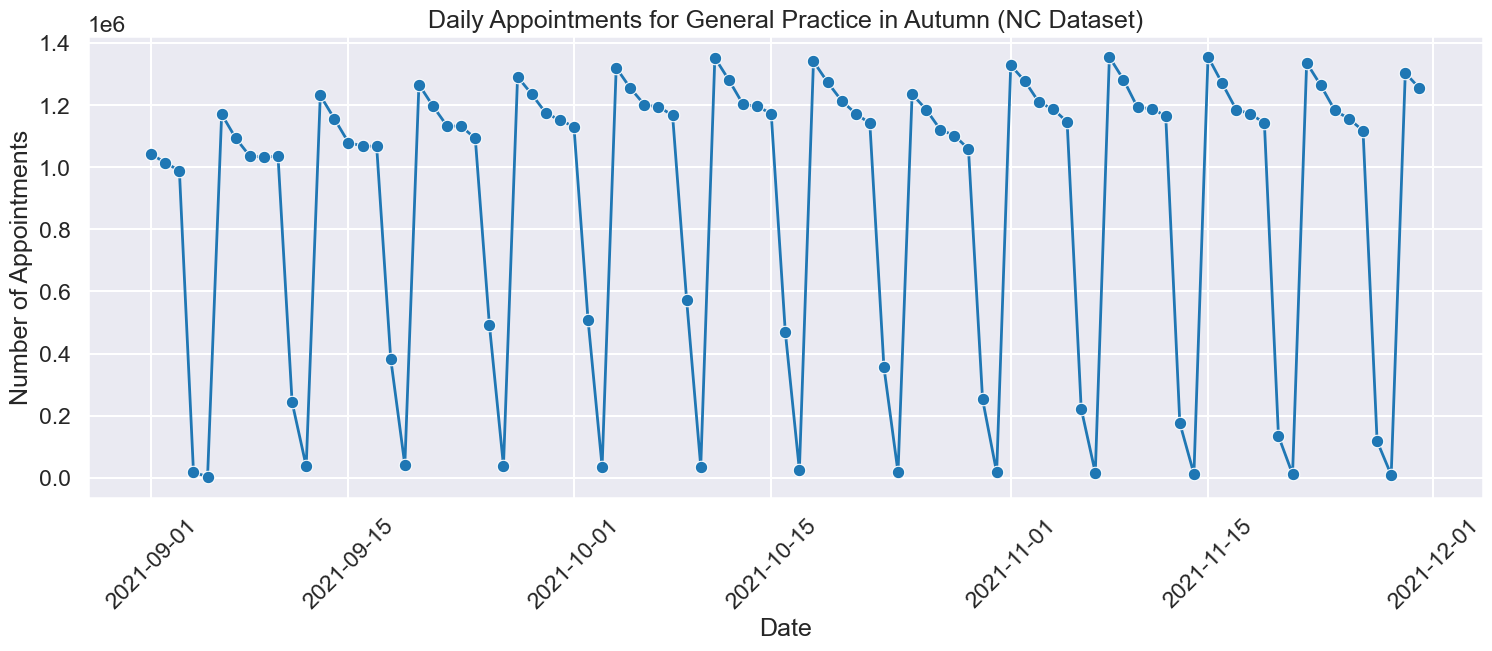

In [705]:
# Create a line plot for General Practice daily trends in Autumn
plt.figure()

sns.lineplot(
    data=nc_autumn_gp, 
    x='appointment_date', 
    y='count_of_appointments', 
    marker='o', 
    linewidth=2, 
    color='tab:blue'
)

# Formatting
plt.xlabel("Date")
plt.ylabel("Number of Appointments")
plt.title("Daily Appointments for General Practice in Autumn (NC Dataset)")
plt.xticks(rotation=45)

# Show plot
plt.show()

**Observation:** In autumn, we also observe a similar trend where the appointments dip on Saturday. However, the dip is not as significant as compared to Summer. This suggests that more GPs were open for services in autumn on Saturdays.

**Winter (December to February 2022):**

In [497]:
# Look at December to February 2022.
nc_winter_gp = nc_gp_day[(nc_gp_day['appointment_month'] >= '2021-12-01') &
                      (nc_gp_day['appointment_month'] <= '2022-02-01')]

nc_winter_gp.head()

,appointment_month,appointment_date,service_setting,count_of_appointments
122,2021-12-01,2021-12-01,General Practice,1162676
123,2021-12-01,2021-12-02,General Practice,1149039
124,2021-12-01,2021-12-03,General Practice,1110060
125,2021-12-01,2021-12-04,General Practice,82337
126,2021-12-01,2021-12-05,General Practice,10084


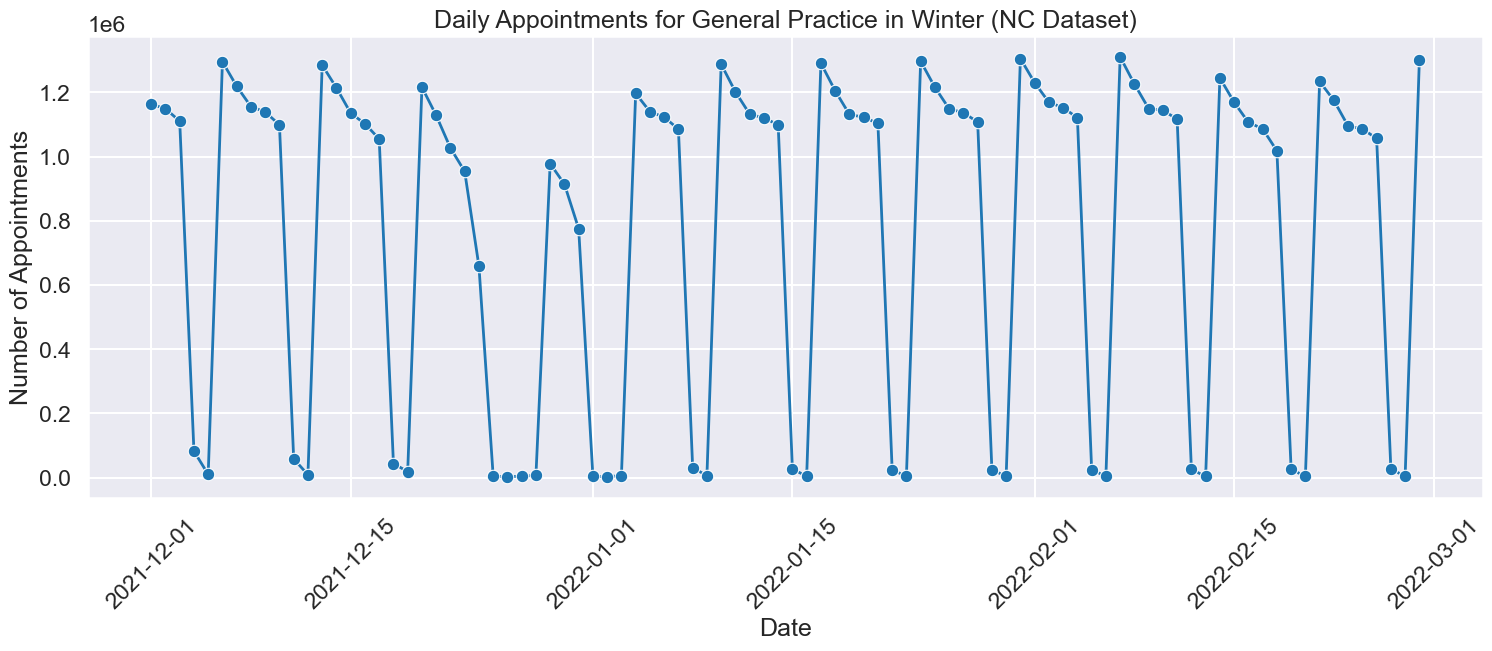

In [707]:
# Create a line plot for General Practice daily trends in Winter
plt.figure()

sns.lineplot(
    data=nc_winter_gp, 
    x='appointment_date', 
    y='count_of_appointments', 
    marker='o', 
    linewidth=2, 
    color='tab:blue'
)

# Formatting
plt.xlabel("Date")
plt.ylabel("Number of Appointments")
plt.title("Daily Appointments for General Practice in Winter (NC Dataset)")
plt.xticks(rotation=45)

# Show plot
plt.show()

**Observation:** In Winter, there is the same trend of appointments dipping on Saturday. In the last dew days of December and first few days of January, it is likely that there was office closure in the NHS during those days. 

In [510]:
# Look at December 15 to January 10
nc_winter_gp_zoomed = nc_gp_day[(nc_gp_day['appointment_date'] >= '2021-12-15') &
                      (nc_gp_day['appointment_date'] <= '2022-01-10')]

nc_winter_gp_zoomed.head()

,appointment_month,appointment_date,service_setting,count_of_appointments
136,2021-12-01,2021-12-15,General Practice,1135124
137,2021-12-01,2021-12-16,General Practice,1101906
138,2021-12-01,2021-12-17,General Practice,1054671
139,2021-12-01,2021-12-18,General Practice,43934
140,2021-12-01,2021-12-19,General Practice,18735


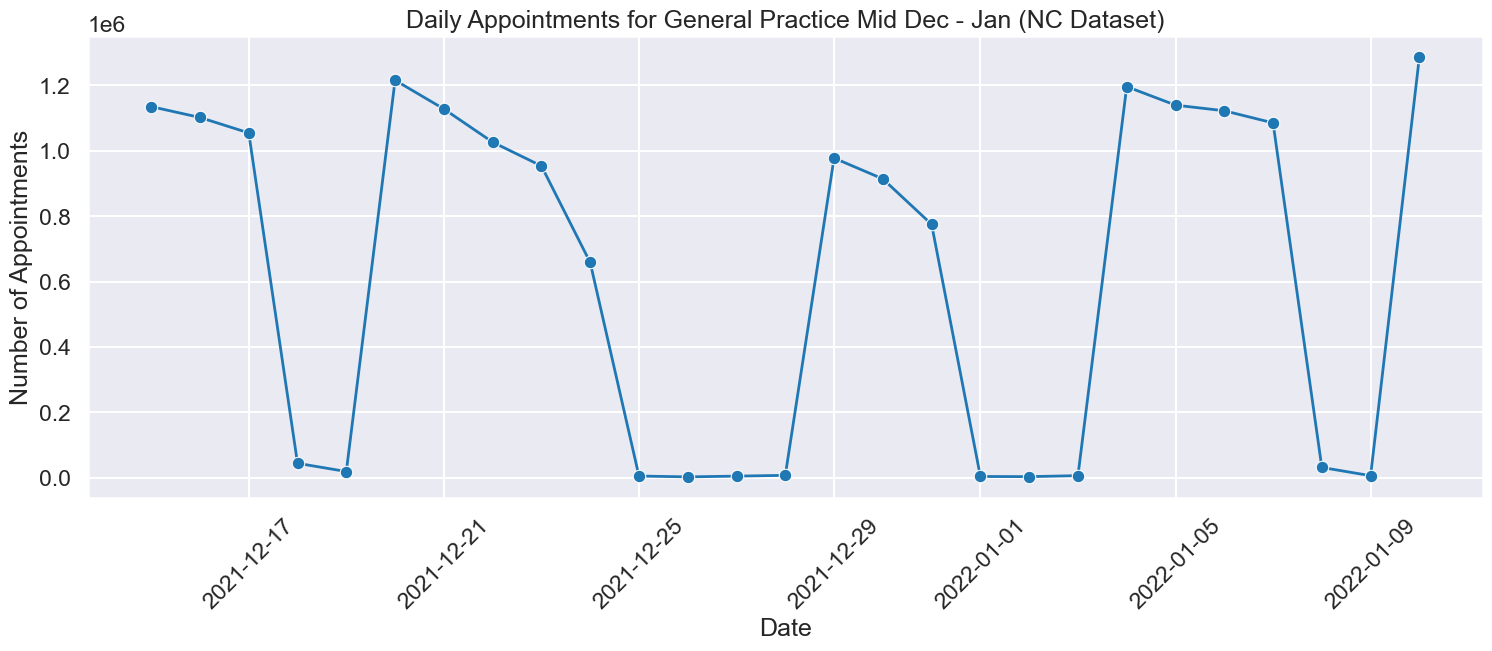

In [709]:
# Create a line plot to have a closer look at December to January
plt.figure()

sns.lineplot(
    data=nc_winter_gp_zoomed, 
    x='appointment_date', 
    y='count_of_appointments', 
    marker='o', 
    linewidth=2, 
    color='tab:blue'
)

# Formatting
plt.xlabel("Date")
plt.ylabel("Number of Appointments")
plt.title("Daily Appointments for General Practice Mid Dec - Jan (NC Dataset)")
plt.xticks(rotation=45)

# Show plot

plt.show()

**Observation:** From the close up, we can see that the office closure happens over the Christmas Break, and start of the year break.

**Spring (March to May 2022):**

In [503]:
# Look at March to May 2022.
nc_spring_gp = nc_gp_day[(nc_gp_day['appointment_month'] >= '2022-03-01') &
                      (nc_gp_day['appointment_month'] <= '2022-05-01')]

nc_spring_gp.head()

,appointment_month,appointment_date,service_setting,count_of_appointments
212,2022-03-01,2022-03-01,General Practice,1229045
213,2022-03-01,2022-03-02,General Practice,1164221
214,2022-03-01,2022-03-03,General Practice,1145324
215,2022-03-01,2022-03-04,General Practice,1121304
216,2022-03-01,2022-03-05,General Practice,28086


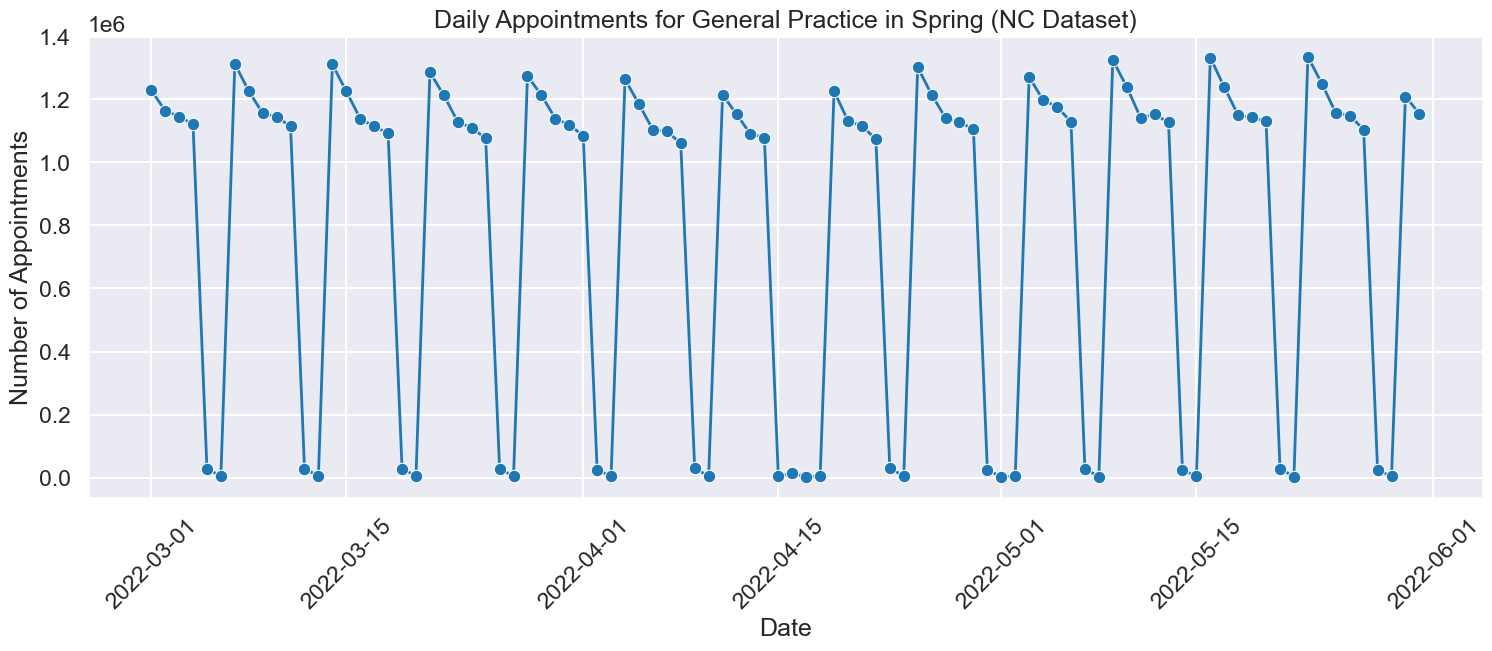

In [711]:
# Create a line plot for General Practice daily trends in Spring
plt.figure()

sns.lineplot(
    data=nc_spring_gp, 
    x='appointment_date', 
    y='count_of_appointments', 
    marker='o', 
    linewidth=2, 
    color='tab:blue'
)

# Formatting
plt.xlabel("Date")
plt.ylabel("Number of Appointments")
plt.title("Daily Appointments for General Practice in Spring (NC Dataset)")
plt.xticks(rotation=45)

# Show plot
plt.show()

**Observation:** There is a similar trend in Spring, and the dip in appointments on 15 April is likely due to the Good Friday public holiday where GPs are closed. 

In [547]:
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,season
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107,Winter
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791,Winter
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686,Winter
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268,Winter
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971,Winter


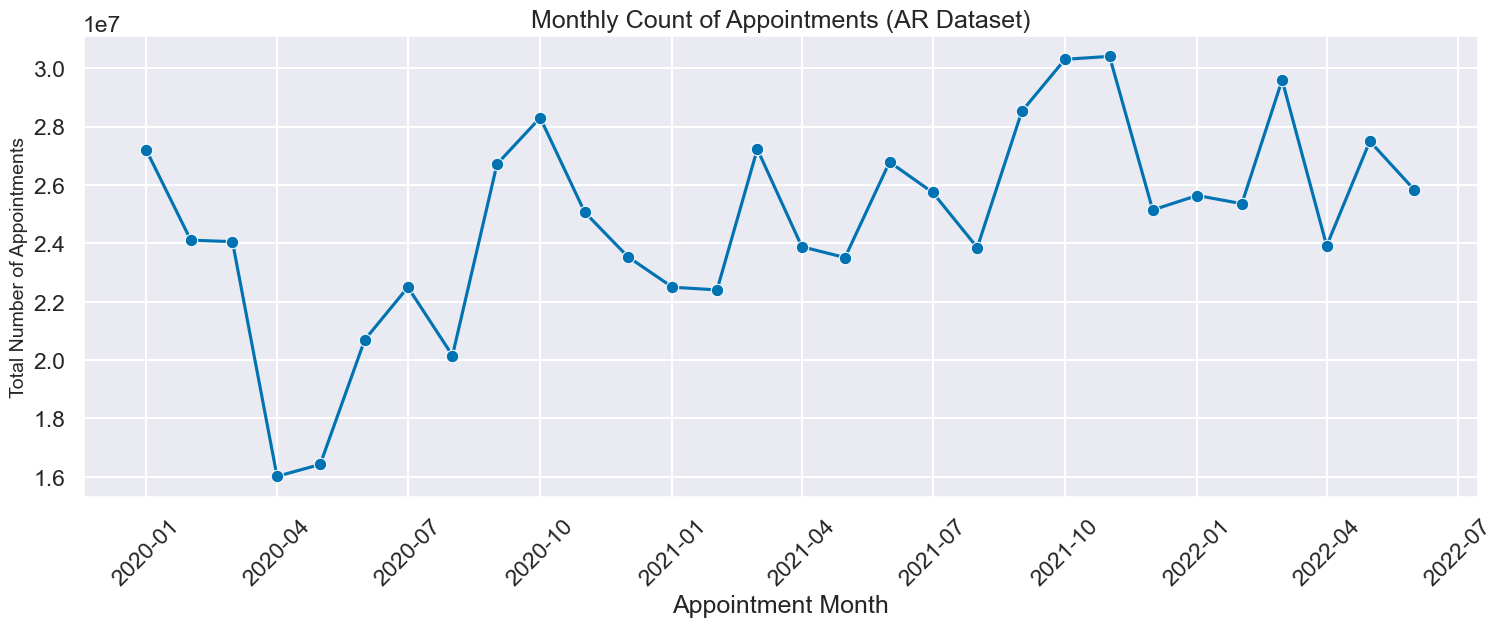

In [731]:
# Group by appointment month and sum the count of appointments
ar_monthly_trends = (
    ar.groupby('appointment_month')['count_of_appointments']
    .sum()
    .reset_index()
)

# Plot line chart
sns.lineplot(
    data=ar_monthly_trends, 
    x='appointment_month', 
    y='count_of_appointments', 
    marker='o'
)

# Formatting
plt.xlabel("Appointment Month")
plt.ylabel("Total Number of Appointments", fontsize=14)
plt.title("Monthly Count of Appointments (AR Dataset)")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show plot
plt.show()


**Observations:** There is a notable reduction in appointment numbers in April 2020, which coincides with the onset of COVID-19 pandemic and UK's first national lockdown, which began 
on 23 March 2020. Following the initial decline, the appointment volumes began to recover from mid 2020 onwards, reflecting NHS' efforts to resume routine services while adapting to pandemic related challenges.

# 4. Longer Term Trends in Data

In this section, we look at longer term trends in data using the ar dataset.

In [958]:
# Prepare workstation.
# Load the appointments_regional.csv file.
# View the DataFrame.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,season
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107,Winter
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791,Winter
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686,Winter
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268,Winter
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971,Winter


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [641]:
# Create an aggregated data set to review the different features.
ar_agg = ar.groupby(['appointment_month', 'hcp_type', 'appointment_status', 
                              'time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()

# View the DataFrame.
ar_agg.head()

,appointment_month,hcp_type,appointment_status,time_between_book_and_appointment,count_of_appointments
0,2020-01-01,GP,Attended,1 Day,911893
1,2020-01-01,GP,Attended,15 to 21 Days,700589
2,2020-01-01,GP,Attended,2 to 7 Days,2253327
3,2020-01-01,GP,Attended,22 to 28 Days,465696
4,2020-01-01,GP,Attended,8 to 14 Days,1315185


In [733]:
# Determine the total number of appointments per month.
ar_df = ar.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

# NHS max capacity
nhs_max_capacity = 1_200_000

# Calculate the daily utilisation percentage.
# Divide the total monthly appointments by 30 to get the daily value, then compare against capacity.
ar_df['utilisation'] = ((ar_df['count_of_appointments'] / 30) / nhs_max_capacity * 100).round(1)

# Create a new column to indicate whether utilisation exceeds capacity.
ar_df['exceeds_capacity'] = ar_df['utilisation'] > 100  # Exceeds 100% capacity

# View the DataFrame.
ar_df.head()

,appointment_month,count_of_appointments,utilisation,exceeds_capacity
0,2020-01-01,27199296,75.6,False
1,2020-02-01,24104621,67.0,False
2,2020-03-01,24053468,66.8,False
3,2020-04-01,16007881,44.5,False
4,2020-05-01,16417212,45.6,False


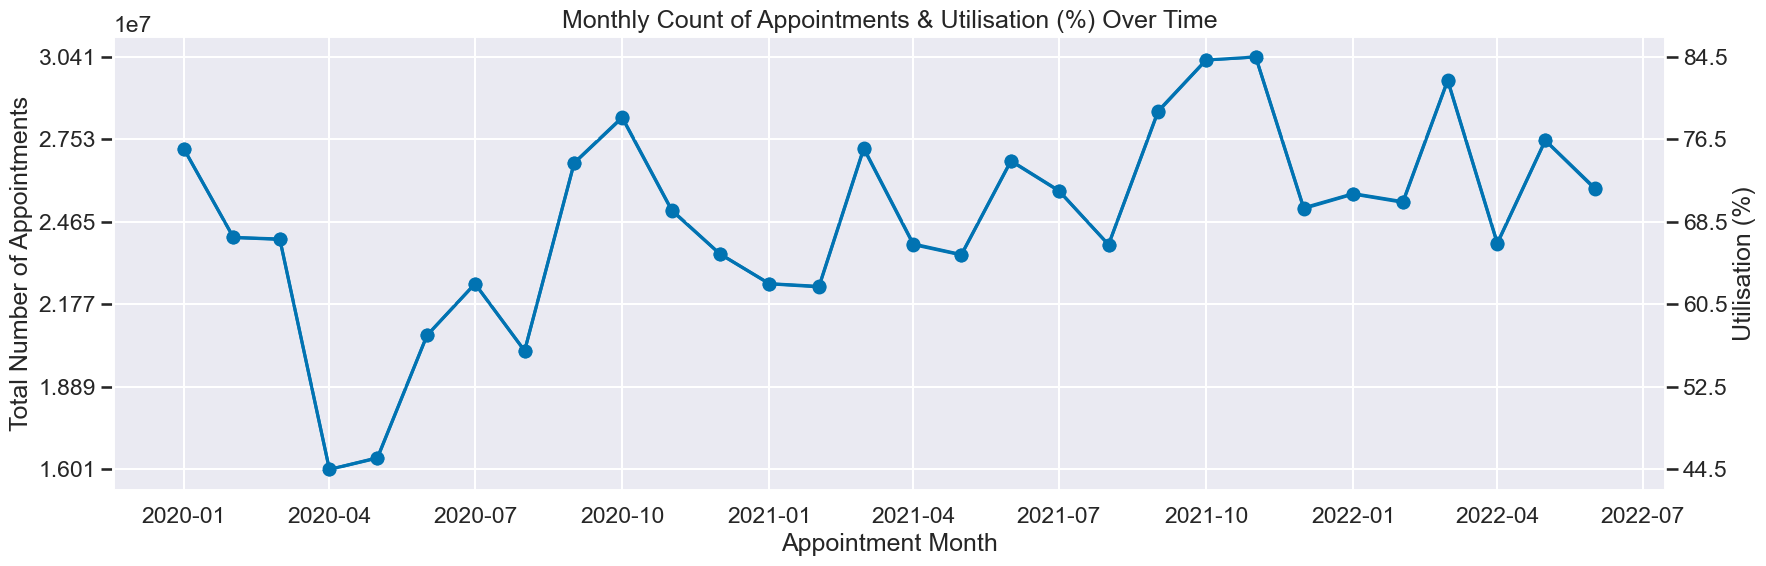

In [960]:
fig, ax1 = plt.subplots()

# Primary y-axis: Total count of appointments
ax1.plot(ar_df['appointment_month'], ar_df['count_of_appointments'], marker='o')
ax1.set_xlabel("Appointment Month")
ax1.set_ylabel("Total Number of Appointments")

# Set primary y-axis ticks
ax1.set_yticks(np.linspace(ar_df['count_of_appointments'].min(), ar_df['count_of_appointments'].max(), num=6))

# Create secondary y-axis for utilisation
ax2 = ax1.twinx()
ax2.plot(ar_df['appointment_month'], ar_df['utilisation'], marker='o')
ax2.set_ylabel("Utilisation (%)")

# Set secondary y-axis ticks
ax2.set_yticks(np.linspace(ar_df['utilisation'].min(), ar_df['utilisation'].max(), num=6))

# Title
plt.title("Monthly Count of Appointments & Utilisation (%) Over Time")
fig.tight_layout()

plt.show()


**Observations:** There is a notable reduction in appointment numbers in April 2020, which coincides with the onset of COVID-19 pandemic and UK's first national lockdown, which began on 23 March 2020. Following the initial decline, the appointment volumes began to recover from mid 2020 onwards, reflecting NHS' efforts to resume routine services while adapting to pandemic related challenges. The monthly capacity utilisation has not exceeded 85%, indicating that the current infrastructure is sufficient to deal with patient demands.

**Source:** https://pmc.ncbi.nlm.nih.gov/articles/PMC7060560/

**Question 2:** How do the healthcare professional types differ over time?

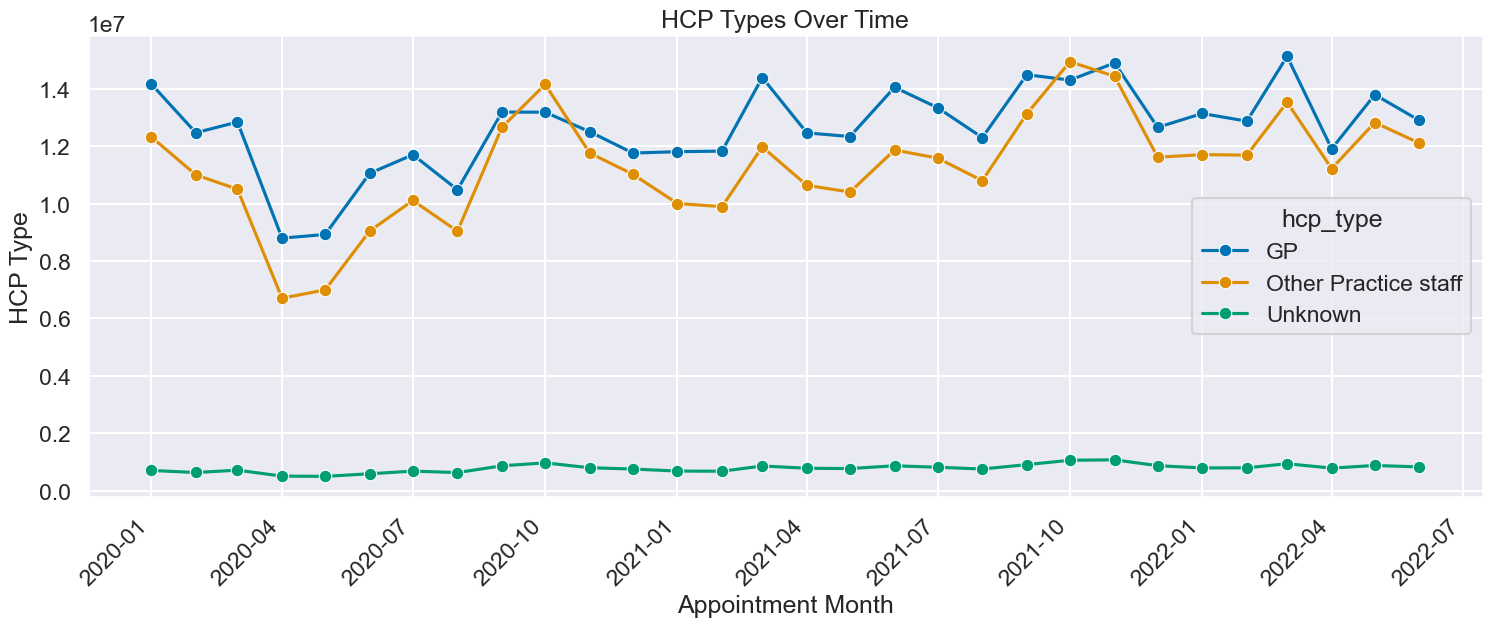

In [962]:
# View data
ar_agg.head()

# Aggregate data: Count total appointments for each HCP type per month
hcp_agg = ar_agg.groupby(['appointment_month', 'hcp_type'])['count_of_appointments'].sum().reset_index()

# Create a line plot
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='hcp_type', data=hcp_agg, marker='o', linestyle='-')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title("HCP Types Over Time")
plt.xlabel("Appointment Month")
plt.ylabel("HCP Type")

# Show the plot
plt.show()

**Observation:** General Practice consistently handles a higher number of appointments than Other Practice staff, but the gap between the two is not large, which means that both roles are essential in managing patients.

**Question 3:** Are there significant changes in whether or not visits are attended?

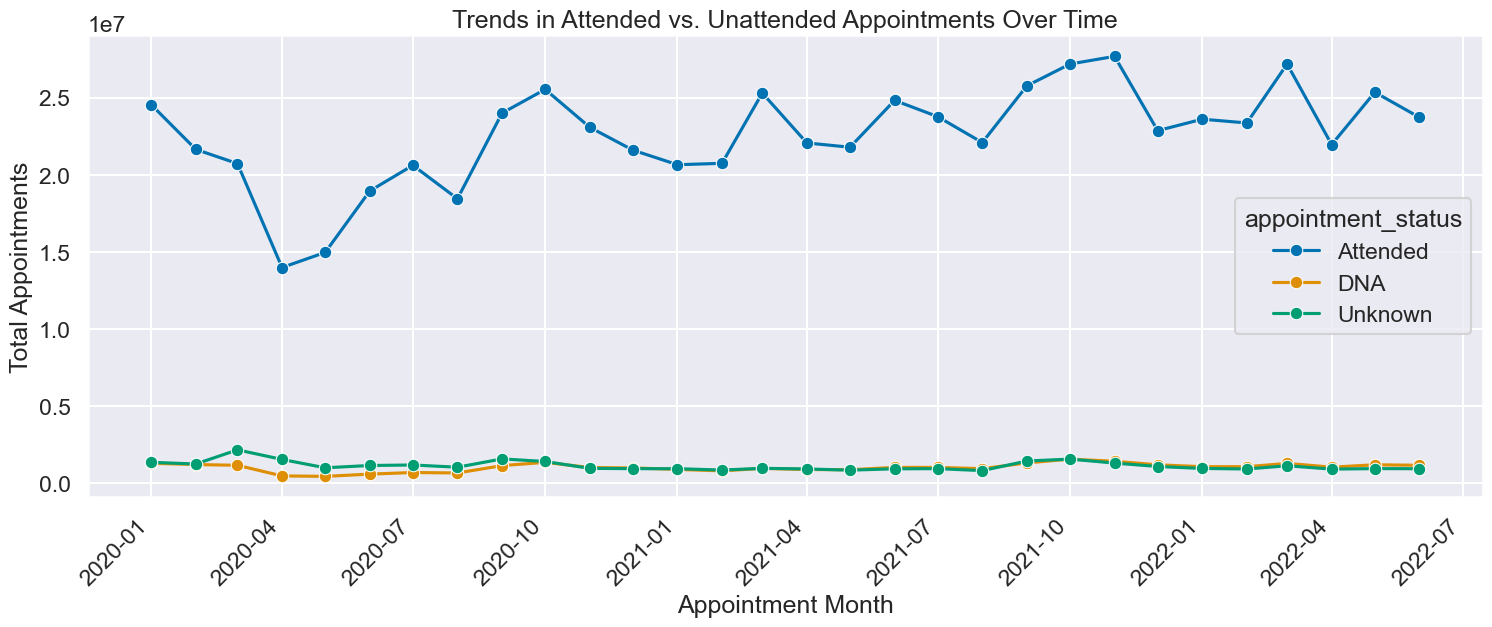

In [964]:
# Create a new dataframe
attendance_df = ar.groupby(['appointment_month', 'appointment_status'])['count_of_appointments'].sum().reset_index()

# Create a line plot to show trends in appointment attendance
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_status', data=attendance_df, marker='o', linestyle='-')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title("Trends in Attended vs. Unattended Appointments Over Time")
plt.xlabel("Appointment Month")
plt.ylabel("Total Appointments")

# Show the plot
plt.show()

**Observation:** The count of appointments attended are significantly higher than appointments not attended.

**Question 4:** Are there changes in terms of appointment type and the busiest months?

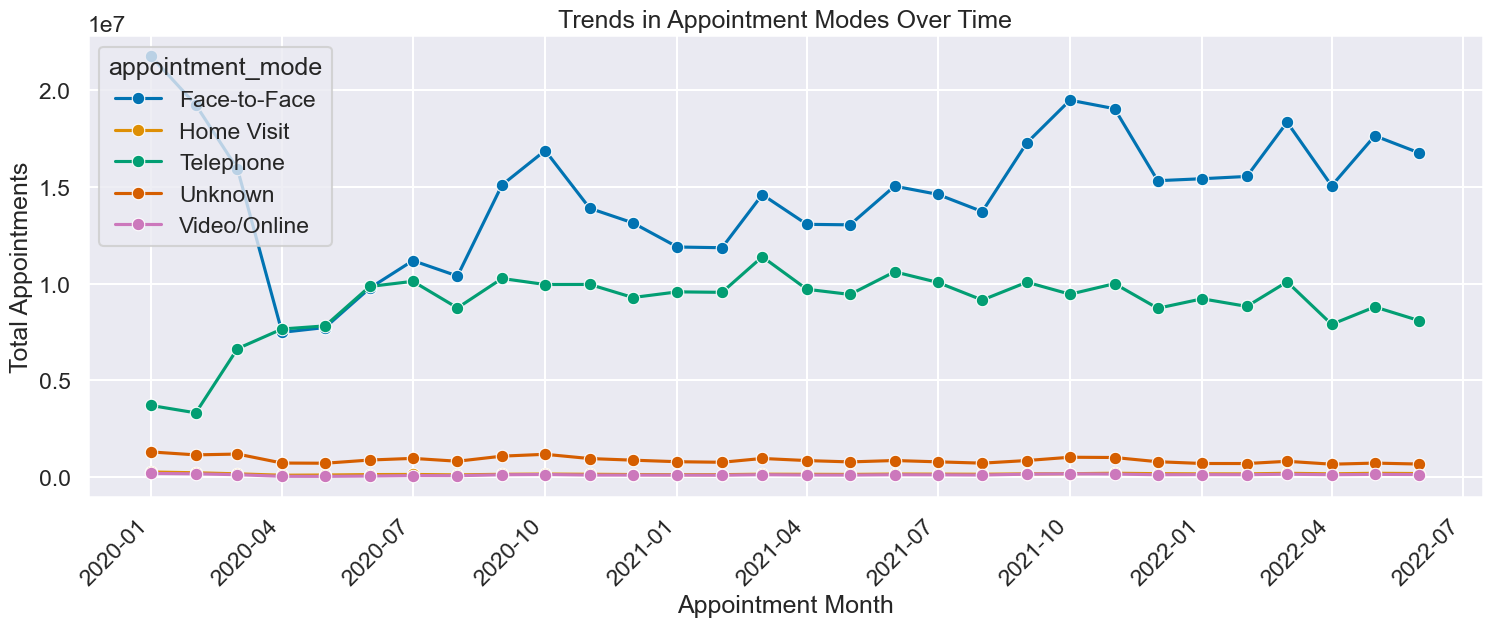

In [966]:
# Create a new DataFrame with appointment_month, appointment_mode, and count_of_appointments
appointment_trend_df = ar.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments'].sum().reset_index()

# Create a line plot to visualize appointment type trends over time
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_mode', data=appointment_trend_df, marker='o', linestyle='-')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title("Trends in Appointment Modes Over Time")
plt.xlabel("Appointment Month")
plt.ylabel("Total Appointments")

# Show the plot
plt.show()

**Observation:** There was a sharp drop in Face to Face appointments in March 2020 when the first covid lockdown happened. At the same time, Telephone appointments increased which reflects the shift away from physical consultations due to lockdown restrictions.

**Question 5:** Are there any trends in time between booking and appointment?

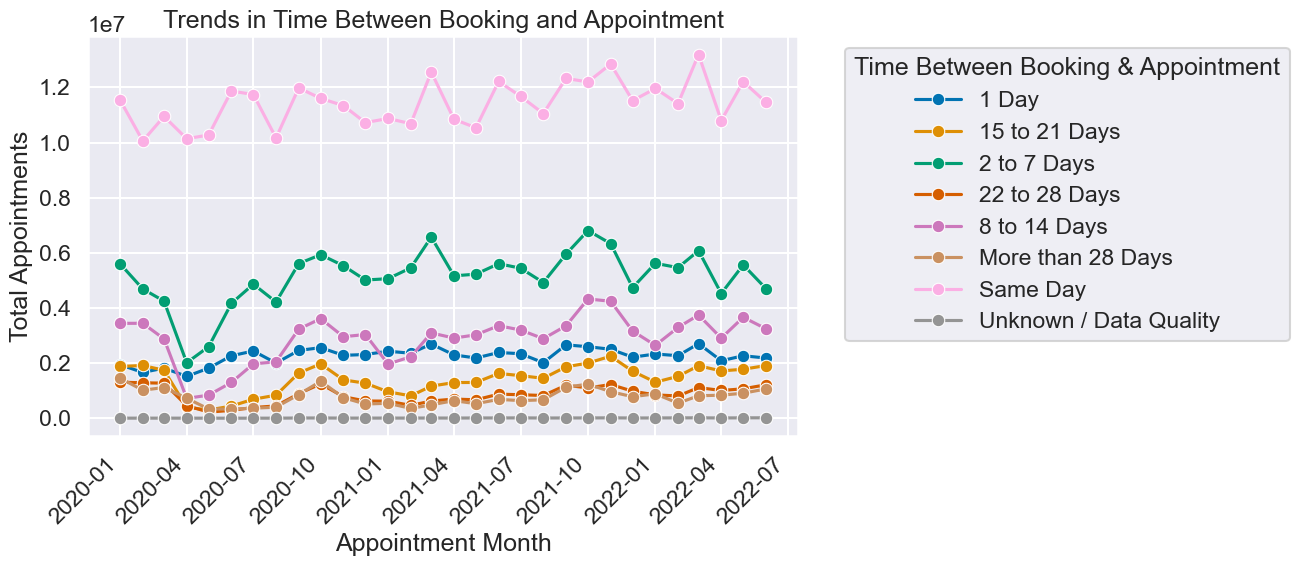

In [968]:
# Create a new DataFrame with appointment_month, time_between_book_and_appointment, and count_of_appointments
booking_trend_df = ar.groupby(['appointment_month', 'time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()

# Create a line plot to visualize booking time trends over time
plt.figure(figsize=(16, 6))
sns.lineplot(
    x='appointment_month', 
    y='count_of_appointments', 
    hue='time_between_book_and_appointment', 
    data=booking_trend_df, 
    marker='o', 
    linestyle='-'
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title("Trends in Time Between Booking and Appointment")
plt.xlabel("Appointment Month")
plt.ylabel("Total Appointments")

# Move legend outside
plt.legend(title="Time Between Booking & Appointment", bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout to prevent cutting off the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()

**Observations:** Same day appointments consistently dominate, suggesting that the NHS system allows for quick bookings and have enough capacity to deal with same day appointments. 

# 5. Missed Appointment Trends in Data

In [899]:
# Check the dataframe that includes the location detail
ar_updated.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,season,ICB22CDH,icb_ons_name
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107,Winter,QNQ,NHS Frimley Integrated Care Board
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791,Winter,QNQ,NHS Frimley Integrated Care Board
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686,Winter,QNQ,NHS Frimley Integrated Care Board
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268,Winter,QNQ,NHS Frimley Integrated Care Board
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971,Winter,QNQ,NHS Frimley Integrated Care Board


In [901]:
# Group the data by Appointment Month, ICB Name and Appointment Mode for further analysis

ar_summary = (
    ar_updated
    .groupby(['appointment_month','icb_ons_name', 'appointment_mode'])
    .agg(
        total_appointments=('count_of_appointments', 'sum'),
        missed_appointments=('appointment_status', lambda x: (x == 'DNA').sum())
    )
    .reset_index()
)

ar_summary.head()

,appointment_month,icb_ons_name,appointment_mode,total_appointments,missed_appointments
0,2020-01-01,"NHS Bath and North East Somerset, Swindon and Wiltshire Integrated Care Board",Face-to-Face,402637,16
1,2020-01-01,"NHS Bath and North East Somerset, Swindon and Wiltshire Integrated Care Board",Home Visit,955,6
2,2020-01-01,"NHS Bath and North East Somerset, Swindon and Wiltshire Integrated Care Board",Telephone,80148,14
3,2020-01-01,"NHS Bath and North East Somerset, Swindon and Wiltshire Integrated Care Board",Unknown,19465,7
4,2020-01-01,"NHS Bath and North East Somerset, Swindon and Wiltshire Integrated Care Board",Video/Online,5149,10


In [930]:
# Calculate percentage of missed appointments
ar_summary['missed_percentage'] = (ar_summary['missed_appointments'] / ar_summary['total_appointments']) * 100

# Sort the data in descending order based on missed_percentage
ar_summary = ar_summary.sort_values(by='missed_percentage', ascending=False)

# Display the updated DataFrame
ar_summary.head()

,appointment_month,icb_ons_name,appointment_mode,total_appointments,missed_appointments,missed_percentage
3961,2021-08-01,"NHS Bristol, North Somerset and South Gloucestershire Integrated Care Board",Video/Online,3,1,33.333333
1282,2020-07-01,NHS Cornwall and the Isles of Scilly Integrated Care Board,Video/Online,3,1,33.333333
1262,2020-07-01,"NHS Bristol, North Somerset and South Gloucestershire Integrated Care Board",Video/Online,4,1,25.000000
5754,2022-04-01,"NHS Shropshire, Telford and Wrekin Integrated Care Board",Video/Online,9,2,22.222222
5961,2022-05-01,"NHS Shropshire, Telford and Wrekin Integrated Care Board",Video/Online,10,2,20.000000


**Missed Appointment Trends for the Top 5 ICBs with the highest average DNA percentage**

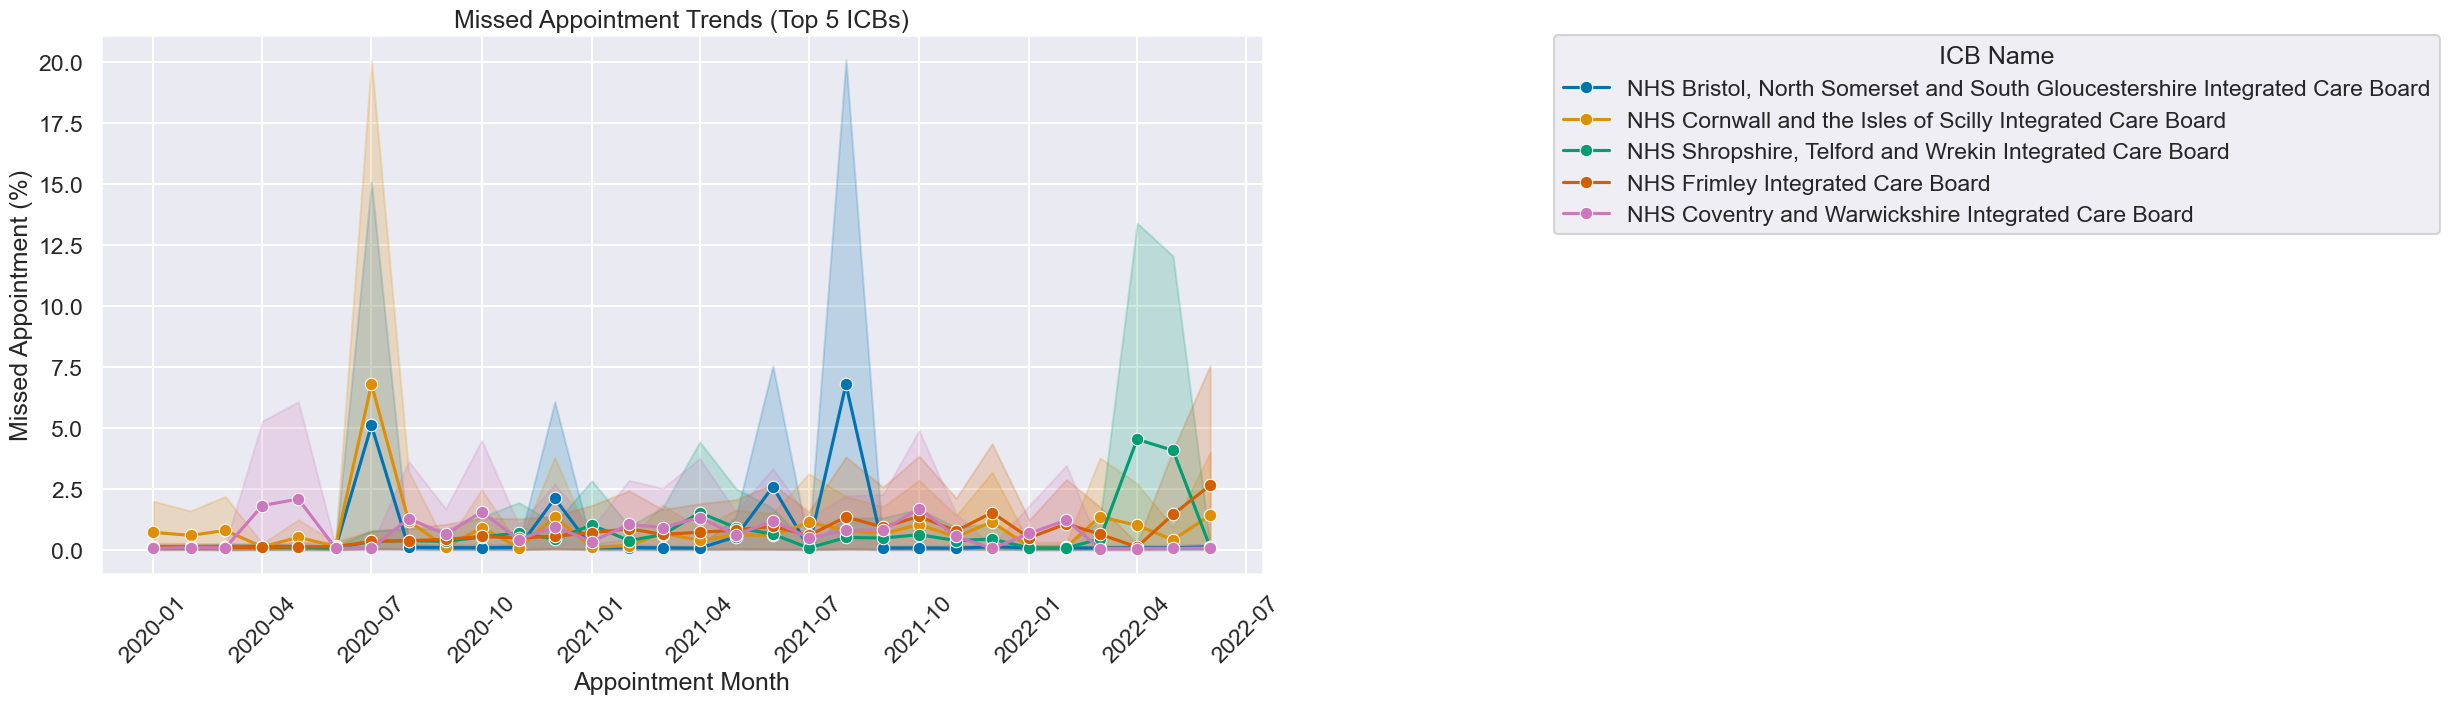

In [921]:
# Select top 5 ICBs with highest average missed percentage
top_5_icbs = (
    ar_summary.groupby("icb_ons_name")["missed_percentage"]
    .mean()
    .nlargest(5)
    .index
)

# Filter data for only top 5 ICBs
top_5_data = ar_summary[ar_summary["icb_ons_name"].isin(top_5_icbs)]

# Plot line chart
plt.figure(figsize=(15, 7))
sns.lineplot(
    data=top_5_data,
    x="appointment_month",
    y="missed_percentage",
    hue="icb_ons_name",
    marker="o"
)

plt.xlabel("Appointment Month")
plt.ylabel("Missed Appointment (%)")
plt.title("Missed Appointment Trends (Top 5 ICBs)")

# Move legend outside the plot
plt.legend(title="ICB Name", bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0)

plt.xticks(rotation=45)

# Ensure layout adjustment for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1]) 

plt.show()


**Observation:** The majority of missed appointment percentages remain below 5% for most months, indicating a relatively low no-show rate. A sharp increase in DNA can be seen around mid 2020 and mid 2021, which could be attributed to COVID-19 lockdowns, or changes in healthcare policies. NHS Bristol, NHS Cornwall and NHS Shropshire showed high peaks, indicating that they experience larger fluctuations in missed appointment rates. 

**Missed Appointment Trends by Appointment Mode over time**

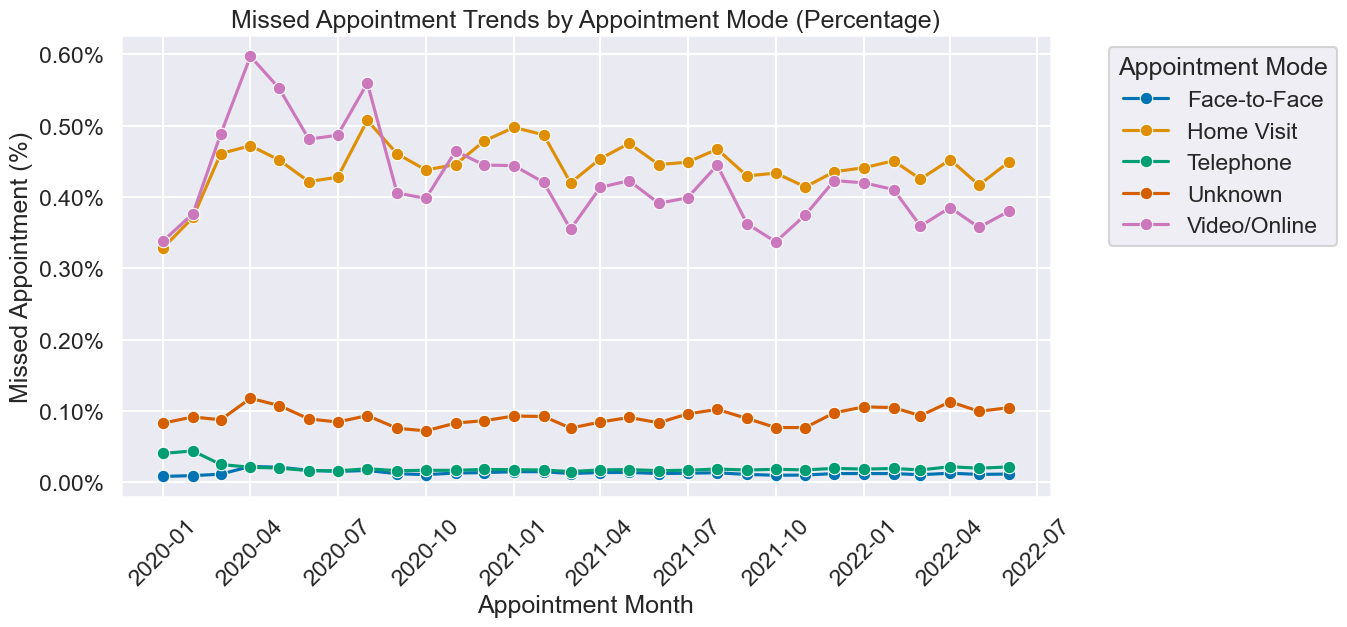

In [937]:
# Group by appointment month and appointment mode, summing the total and missed appointments
missed_by_mode = (
    ar_updated
    .groupby(["appointment_month", "appointment_mode"])
    .agg(
        total_appointments=("count_of_appointments", "sum"),
        missed_appointments=("appointment_status", lambda x: (x == "DNA").sum())
    )
    .reset_index()
)

# Calculate the missed appointment percentage
missed_by_mode["missed_percentage"] = (missed_by_mode["missed_appointments"] / missed_by_mode["total_appointments"]) * 100

# Plot the trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=missed_by_mode,
    x="appointment_month",
    y="missed_percentage",
    hue="appointment_mode",
    marker="o"
)

# Format the y-axis to display percentages correctly
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.xlabel("Appointment Month")
plt.ylabel("Missed Appointment (%)")
plt.title("Missed Appointment Trends by Appointment Mode (Percentage)")
plt.xticks(rotation=45)
plt.legend(title="Appointment Mode", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


**Observations:** Video/Online appointments and Home Visits consistently have the highest DNA rates, although they stabilised from the end of 2020 onwards. Face to Face visits have near zero missed dates, likely due to stronger patient commitments and in-person obligations. 

**Missed Appointment Trends by Time Between Booking and Appointment over time**

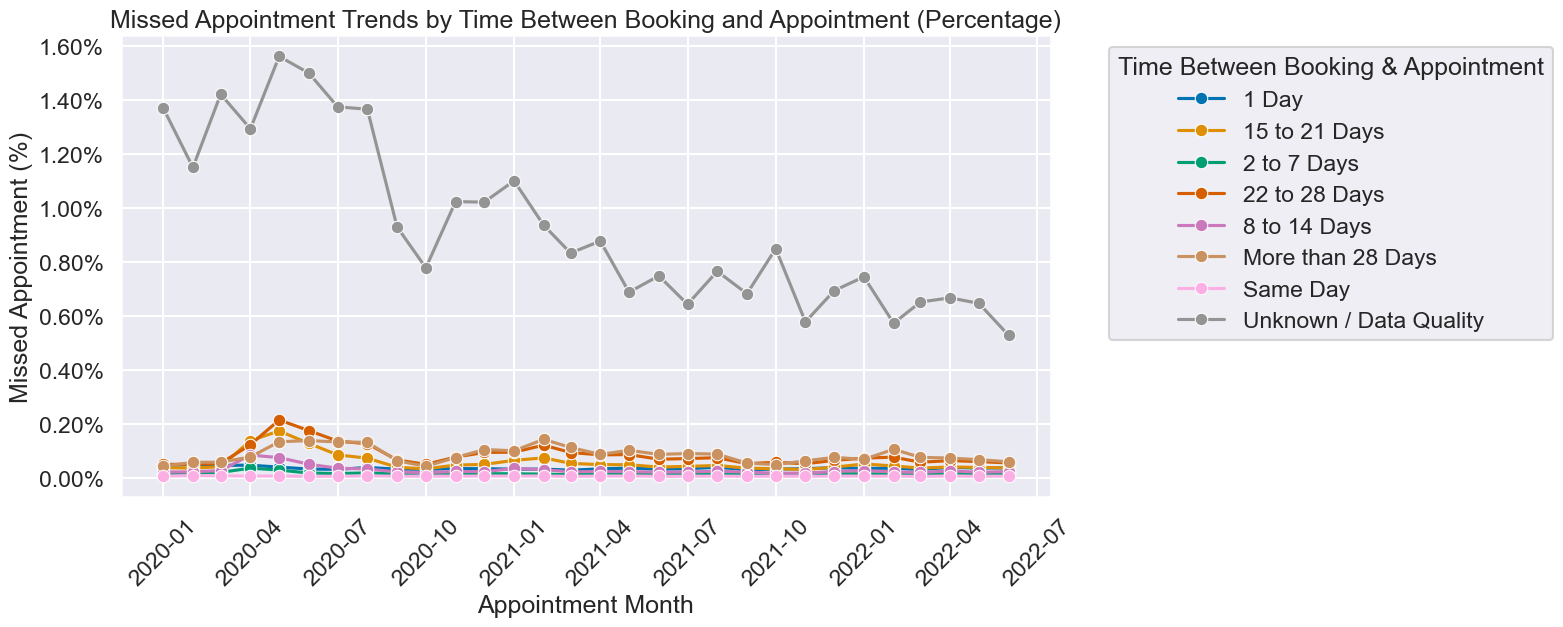

In [939]:
# Group by appointment month and time between booking & appointment, summing the total and missed appointments
missed_by_time = (
    ar_updated
    .groupby(["appointment_month", "time_between_book_and_appointment"])
    .agg(
        total_appointments=("count_of_appointments", "sum"),
        missed_appointments=("appointment_status", lambda x: (x == "DNA").sum())
    )
    .reset_index()
)

# Calculate the missed appointment percentage
missed_by_time["missed_percentage"] = (missed_by_time["missed_appointments"] / missed_by_time["total_appointments"]) * 100

# Plot the trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=missed_by_time,
    x="appointment_month",
    y="missed_percentage",
    hue="time_between_book_and_appointment",
    marker="o"
)

# Format the y-axis to display percentages correctly
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.xlabel("Appointment Month")
plt.ylabel("Missed Appointment (%)")
plt.title("Missed Appointment Trends by Time Between Booking and Appointment (Percentage)")
plt.xticks(rotation=45)
plt.legend(title="Time Between Booking & Appointment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


**Observation:** The unknown data skews the distribution and makes it unclear for us to look at the others. Therefore, we willl remove the unknown data from our visualisation. 

**Missed Appointment Trends by Time Between Booking and Appointment over time excluding Unknown/Data Quality**

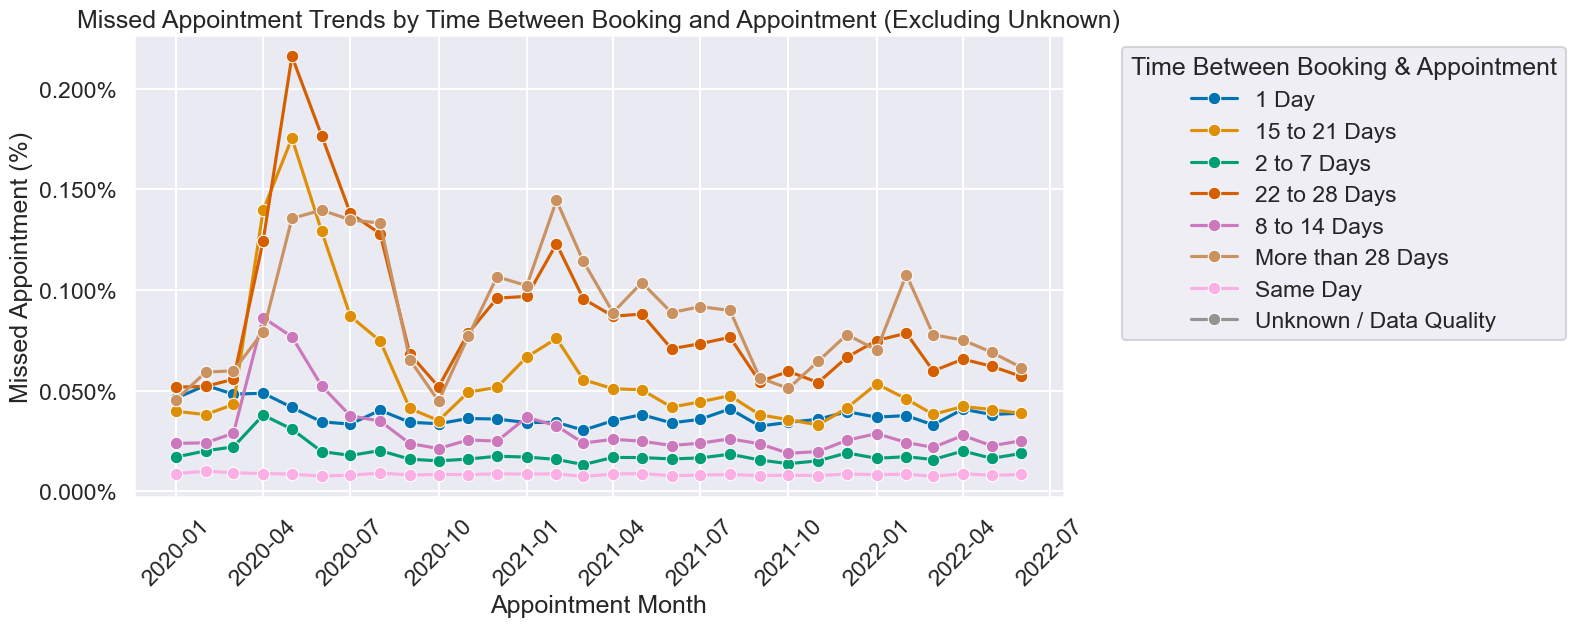

In [941]:
# Exclude "Unknown / Data Quality"
filtered_missed_by_time = missed_by_time[missed_by_time["time_between_book_and_appointment"] != "Unknown / Data Quality"]

# Plot the trend over time without "Unknown / Data Quality"
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=filtered_missed_by_time,
    x="appointment_month",
    y="missed_percentage",
    hue="time_between_book_and_appointment",
    marker="o"
)

# Format the y-axis to display percentages correctly
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.xlabel("Appointment Month")
plt.ylabel("Missed Appointment (%)")
plt.title("Missed Appointment Trends by Time Between Booking and Appointment (Excluding Unknown)")
plt.xticks(rotation=45)
plt.legend(title="Time Between Booking & Appointment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


**Observation:** Longer booking times have higher missed appointment rates, suggesting that patients forget or deprioritise long term bookings. On the other hand, patients who book closer to the appointment date are more likely to attend. 

# Appendix

### Delving into missing and unmapped Data

In [237]:
# Define categories and calculate missing percentages
missing_data = {
    "Service Setting": (nc['service_setting'] == 'Unmapped').mean(),
    "Context Type": (nc['context_type'] == 'Unmapped').mean(),
    "National Category Unmapped": (nc['national_category'] == 'Unmapped').mean(),
    "National Category Inconsistent": (nc['national_category'] == 'Inconsistent Mapping').mean(),
    "Unknown Appointment Status": (ar['appointment_status'] == 'Unknown').mean()
}

# Convert to DataFrame and format percentages
missing_data_df = pd.DataFrame(missing_data.items(), columns=['Category', 'Missing Percentage'])
missing_data_df['Missing Percentage'] = (missing_data_df['Missing Percentage'] * 100).round(2)

# Display the DataFrame
missing_data_df

,Category,Missing Percentage
0,Service Setting,3.35
1,Context Type,3.35
2,National Category Unmapped,3.35
3,National Category Inconsistent,10.95
4,Unknown Appointment Status,33.73


In [273]:
# Get the top 10 locations which has the highest amount of unmapped data
# Create DataFrame for Unmapped Service Setting
nc_unmapped_service_df = nc[nc['service_setting'] == 'Unmapped']['sub_icb_location_name'].value_counts().head(10).reset_index()
nc_unmapped_service_df.columns = ['Sub ICB Location', 'Unmapped Service Setting Count']

# Create DataFrame for Unmapped Context Type
nc_unmapped_context_df = nc[nc['context_type'] == 'Unmapped']['sub_icb_location_name'].value_counts().head(10).reset_index()
nc_unmapped_context_df.columns = ['Sub ICB Location', 'Unmapped Context Type Count']

# Create DataFrame for Unmapped National Category
nc_unmapped_category_df = nc[nc['national_category'] == 'Unmapped']['sub_icb_location_name'].value_counts().head(10).reset_index()
nc_unmapped_category_df.columns = ['Sub ICB Location', 'Unmapped National Category']

# Merge DataFrames on Location (Outer Join to keep all relevant locations)
nc_unmapped_df = pd.merge(nc_unmapped_service_df, nc_unmapped_context_df, on='Sub ICB Location', how='outer')
nc_unmapped_df = pd.merge(nc_unmapped_df, nc_unmapped_category_df, on='Sub ICB Location', how='outer')

# Fill NaN values with 0 (if some locations are missing in certain categories)
nc_unmapped_df.fillna(0, inplace=True)

# Display the DataFrame
nc_unmapped_df

,Sub ICB Location,Unmapped Service Setting Count,Unmapped Context Type Count,Unmapped National Category
0,NHS Birmingham and Solihull ICB - 15E,322,322,322
1,NHS Cambridgeshire and Peterborough ICB - 06H,307,307,307
2,NHS Devon ICB - 15N,331,331,331
3,NHS Humber and North Yorkshire ICB - 03F,304,304,304
4,NHS Kent and Medway ICB - 91Q,322,322,322
5,NHS Norfolk and Waveney ICB - 26A,322,322,322
6,NHS North West London ICB - W2U3Z,334,334,334
7,NHS Suffolk and North East Essex ICB - 06T,326,326,326
8,NHS Sussex ICB - 70F,315,315,315
9,NHS West Yorkshire ICB - 03R,308,308,308


Note: Unmapped Service Setting  Data Collection issues in these areas should be investigated. Staff trainings and audits should be conducted. 

In [271]:
# Get the top 10 locations for Inconsistent Mapping in National Category
nc_inconsistent_category_df = (
    nc[nc['national_category'] == 'Inconsistent Mapping']['sub_icb_location_name']
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={'index': 'Location', 'sub_icb_location_name': 'Sub ICB Location', 'count': 'Inconsistent Mapping Count'})
)

# Display the DataFrame
nc_inconsistent_category_df


,Sub ICB Location,Inconsistent Mapping Count
0,NHS North West London ICB - W2U3Z,1222
1,NHS South East London ICB - 72Q,1163
2,NHS North East London ICB - A3A8R,1155
3,NHS Kent and Medway ICB - 91Q,1152
4,NHS Cheshire and Merseyside ICB - 12F,1106
5,NHS Norfolk and Waveney ICB - 26A,1105
6,NHS Derby and Derbyshire ICB - 15M,1099
7,NHS Black Country ICB - D2P2L,1095
8,NHS Hampshire and Isle Of Wight ICB - D9Y0V,1075
9,NHS Devon ICB - 15N,1061


Note: The Sub ICB Locations with Inconsistent Mapping should be investigated too. 

In [280]:
# Check Which Appointment Modes Have the Most ‘Unknown’ Status
ar_unknown_appointments = ar[ar['appointment_status'] == 'Unknown'].groupby('appointment_mode')['count_of_appointments'].sum().sort_values(ascending=False).reset_index()
ar_unknown_appointments.columns = ['Unknown Appointment Status by Mode', 'Count of Appointments']
ar_unknown_appointments

,Unknown Appointment Status by Mode,Count of Appointments
0,Face-to-Face,23022692
1,Telephone,7801180
2,Unknown,2066528
3,Home Visit,1088237
4,Video/Online,158779


Note: Majority of unknown appointment status are by Face to Face, this indicates poor tracking and should
be alerted for review. 

In [282]:
# Check Which Appointment Modes Have the Most ‘Unknown’ Status
ar_unknown_hcp = ar[ar['appointment_status'] == 'Unknown'].groupby('hcp_type')['count_of_appointments'].sum().sort_values(ascending=False).reset_index()
ar_unknown_hcp.columns = ['Unknown Appointment Status by hcp', 'Count of Appointments']
ar_unknown_hcp

,Unknown Appointment Status by hcp,Count of Appointments
0,Other Practice staff,19691623
1,GP,12374200
2,Unknown,2071593


### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [970]:
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [580]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [582]:
# Explore the metadata.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [584]:
# Explore the data set.
tweets.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [598]:
# Would it be useful to only look at retweeted and favourite tweet messages?
# Explain your answer 
retweet_count = tweets['tweet_retweet_count'].value_counts()
favorite_count = tweets['tweet_favorite_count'].value_counts()
print(retweet_count.head())
print(favorite_count.head())

tweet_retweet_count
0    526
1    215
2    114
3     70
5     35
Name: count, dtype: int64
tweet_favorite_count
0    1027
1      91
2      16
3      13
4       7
Name: count, dtype: int64


Many tweets have zero engagement, this suggests that a large proportion of tweets in the dataset receive no engagement. Thus, it is not helpful to include this in our analysis.

In [586]:
# Create a new DataFrame containing only the text.
tweets['tweet_full_text'] = tweets['tweet_full_text'].astype(str)
tweets_text = tweets[['tweet_full_text']]

# View the DataFrame.
tweets_text

,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."
...,...
1169,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…
1170,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie..."
1171,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp..."
1172,Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYymC


In [600]:
# Loop through the messages, and create a list of values containing the # symbol.
# Extract hashtags from the tweet text
tags = []

# Loop through each tweet and extract words containing '#'
for text in tweets_text['tweet_full_text']:
    words = str(text).split()  # Convert to string and split into words
    hashtags = [word for word in words if word.startswith('#')]  # Filter words that start with '#'
    tags.extend(hashtags)  # Add extracted hashtags to the list

In [602]:
# Display the first 30 records.
print(tags[:30])

['#Healthcare', '#PremiseHealth', '#hiring', '#Healthcare', '#blogs', '#digitaltransformation', '#cybersecurity', '#accounting', '#finance', '#healthcare', '#firstcoastcna', '#cnaexam', '#cnaexampreparation', '#jacksonville', '#cnatraining', '#nurse', '#nursing', '#nurselife', '#nursepractitioner', '#nurseproblems', '#nursingschool', '#healthcare', '#disparities.', '#healthcare', '#alert', '#insurance', '#data', '#Healthcare', '#healthcare', '#Healthcare']


In [608]:
# Convert the series to a DataFrame in preparation for visualisation.
tags_df = pd.DataFrame({'Hashtags': tags})

# Count occurrences of each hashtag
tags_count = tags_df['Hashtags'].value_counts().reset_index()
tags_count.columns = ['Hashtag', 'Count']  # Rename columns

# Display the first few rows
print(tags_count.head())

       Hashtag  Count
0  #healthcare    549
1  #Healthcare    190
2      #health     66
3  #HealthCare     46
4          #AI     43


In [610]:
tags_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717 entries, 0 to 1716
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Hashtag  1717 non-null   object
 1   Count    1717 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.0+ KB


In [614]:
# Display records where the count is larger than 10.
filtered_tags_count = tags_count[tags_count['Count'] > 10]

# Display the filtered DataFrame
print(filtered_tags_count)

                        Hashtag  Count
0                   #healthcare    549
1                   #Healthcare    190
2                       #health     66
3                   #HealthCare     46
4                           #AI     43
5                     #medicine     42
6                          #job     38
7                      #medical     30
8                     #strategy     30
9                       #pharma     25
10               #digitalhealth     25
11                     #biotech     25
12                  #MedTwitter     25
13     #competitiveintelligence     24
14              #pharmaceutical     24
15                   #marketing     24
16                       #MedEd     23
17              #TipsForNewDocs     21
18                     #vaccine     18
19                      #Health     18
20             #MachineLearning     17
21                 #coronavirus     16
22             #WomenInMedicine     16
23        #competitivemarketing     16
24                      #

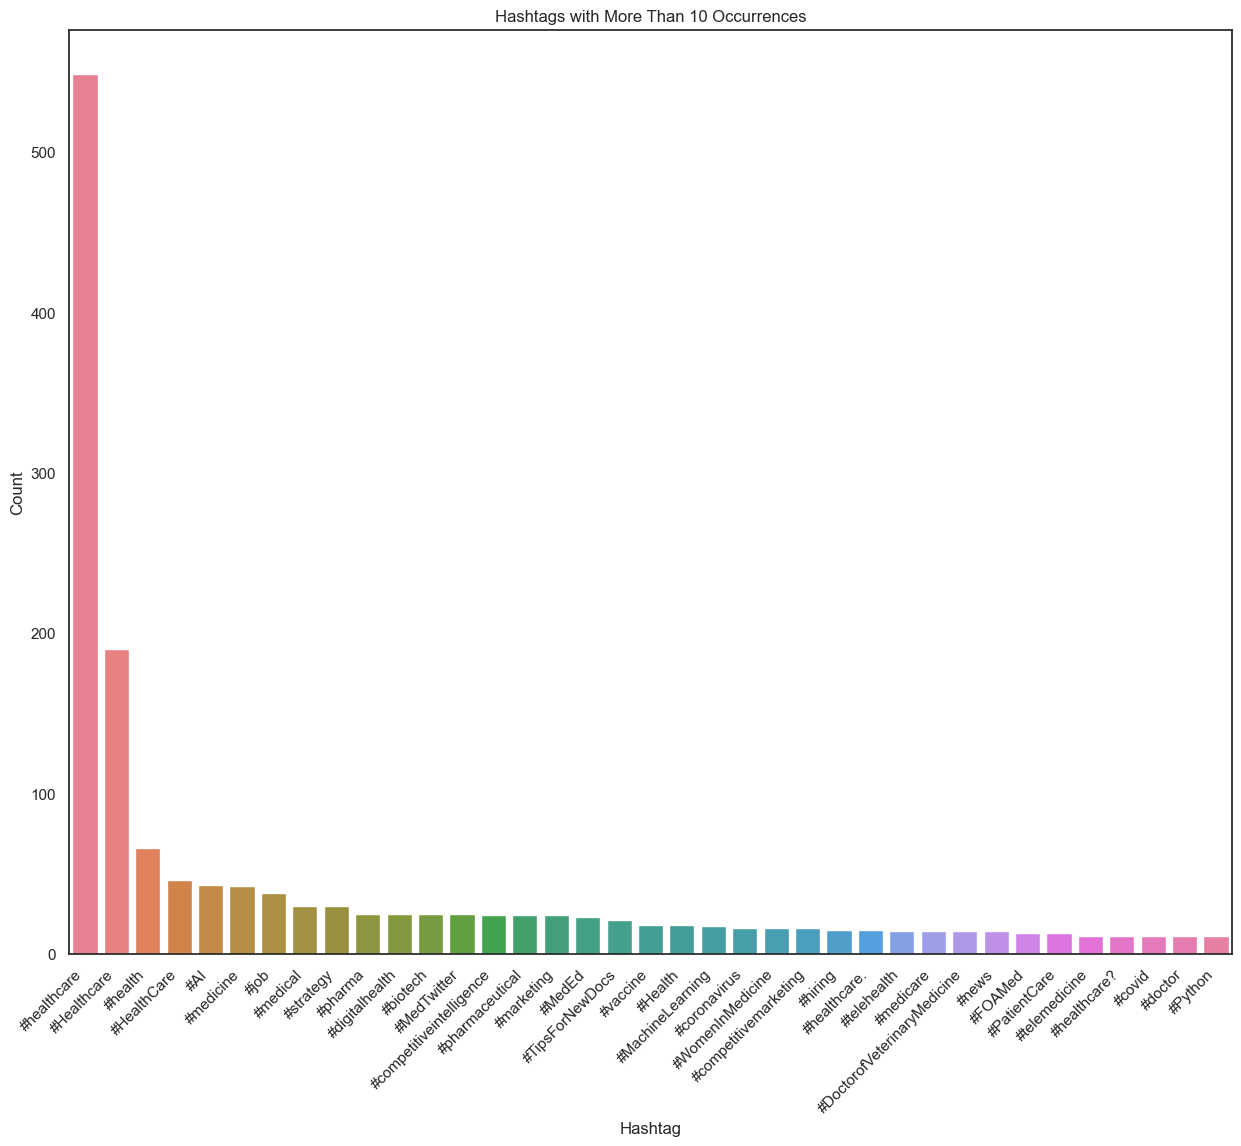

In [616]:
# Create a Seaborn barplot for hashtags with count > 10
sns.barplot(x='Hashtag', y='Count', data=filtered_tags_count, palette='husl')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title("Hashtags with More Than 10 Occurrences")
plt.xlabel("Hashtag")
plt.ylabel("Count")

# Show the plot
plt.show()

**Observation:** #healthcare is overrepresented and skews the data.Remove all instances of #healthcare

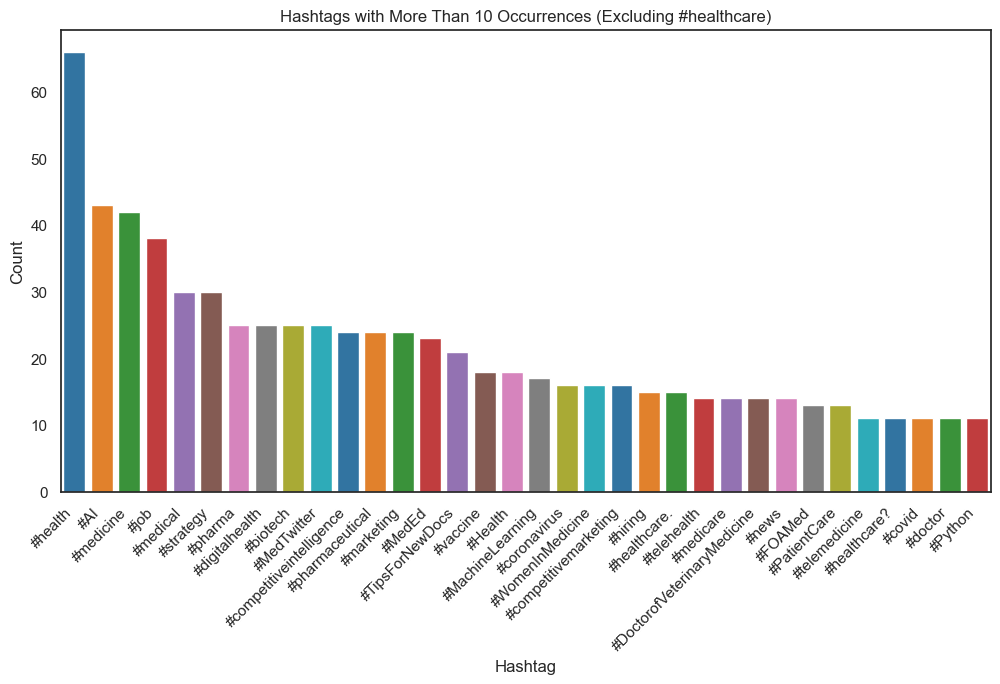

In [618]:
# Remove the overrepresented hashtag "#healthcare"
filtered_tags_count_nohealthcare =  filtered_tags_count[filtered_tags_count['Hashtag'].str.lower() != "#healthcare"]

# Set plot size
plt.figure(figsize=(12,6))

# Create a Seaborn barplot without "#healthcare"
sns.barplot(x='Hashtag', y='Count', data=filtered_tags_count_nohealthcare, palette='tab10')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title("Hashtags with More Than 10 Occurrences (Excluding #healthcare)")
plt.xlabel("Hashtag")
plt.ylabel("Count")

# Show the plot
plt.show()

**Observation:** The hashtags are too general and there is no sentiment attached to these topics. Based on the hashtags alone, we are unable to tell if the tweets have positive or negative sentiment. However, from hashtags like #AI and #MachineLearning, we can tell that technology-driven healthcare topics are gaining attention. 

### Basic Sentiment Analysis on Tweets

We will make use of the vaderSentiment library to conduct a basic sentiment analysis on tweets to find out how the public feels about the NHS. \
Source: https://github.com/cjhutto/vaderSentiment

In [570]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [620]:
#Initialise Sentiment Analyzer

analyzer = SentimentIntensityAnalyzer()

In [622]:
# Function to classify sentiment
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply function to each tweet
tweets_text['sentiment'] = tweets_text['tweet_full_text'].apply(get_sentiment)

In [624]:
# View Sentiment Results 
print(tweets_text[['tweet_full_text', 'sentiment']].head(10))

                                                                                                                                                                                           tweet_full_text  \
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…   
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
3                                                             RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members

In [626]:
# Count Sentiment Distribution
sentiment_counts = tweets_text['sentiment'].value_counts()
print(sentiment_counts)

sentiment
Positive    683
Neutral     342
Negative    149
Name: count, dtype: int64


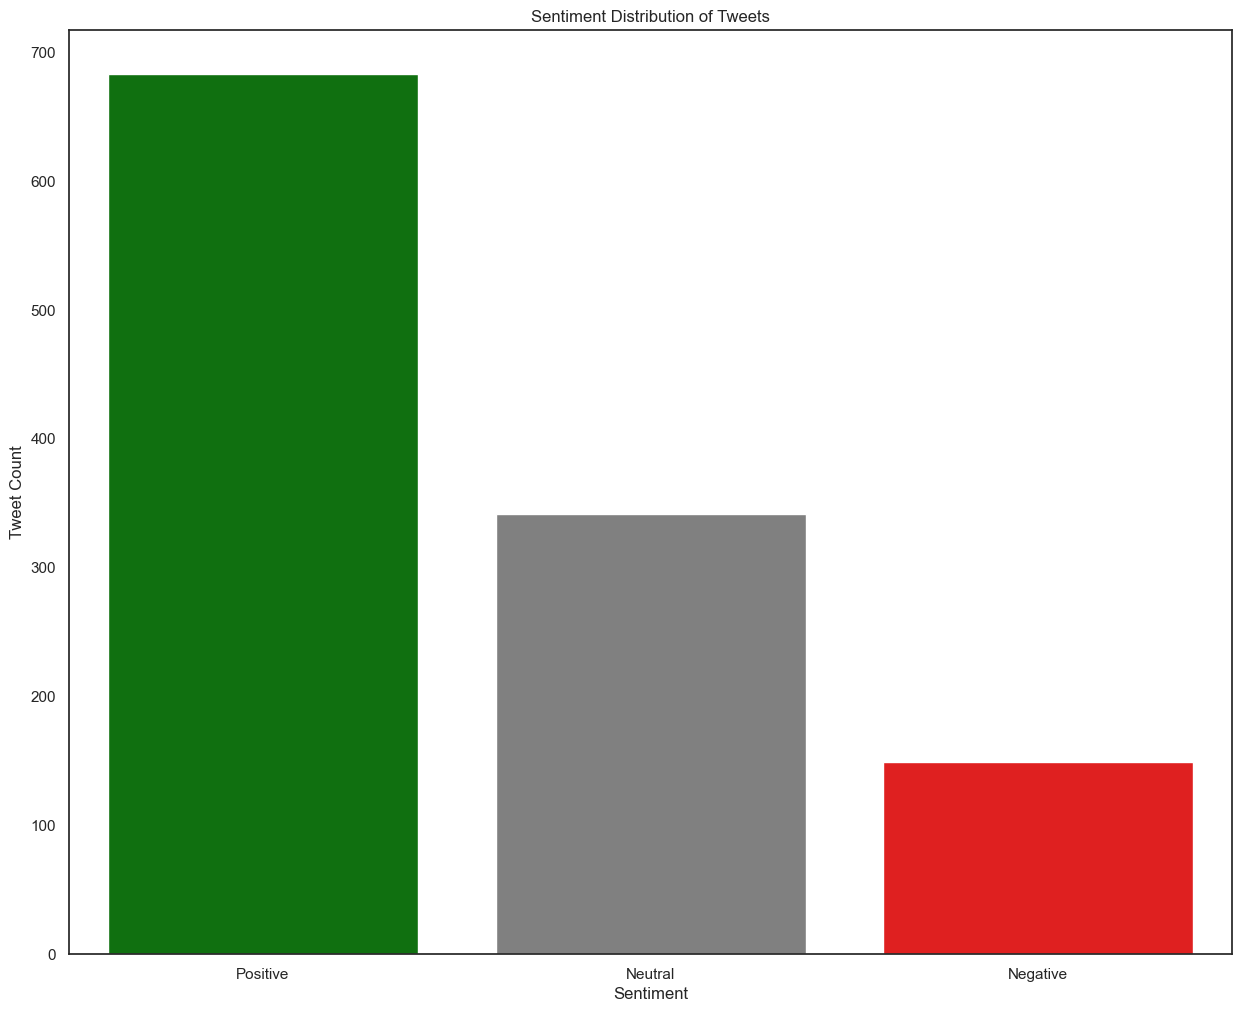

In [630]:
# Visualise Sentiment Distribution
sns.countplot(data=tweets_text, x='sentiment', order=['Positive', 'Neutral', 'Negative'], palette = ['green', 'gray', 'red'])
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.title("Sentiment Distribution of Tweets")
plt.show()

**Observation:** The public generally expresses positive sentiments towards the NHS, which is encouraging. However, this is a preliminary analysis, and a deeper investigation is needed to understand the specific factors driving these sentiments.

**Conclusion:** Based on the provided Twitter data, external sentiment analysis may have limited value for NHS decision-making regarding structural changes. However, it can be useful for identifying customer pain points and monitoring specific issues raised by individuals. If leveraged effectively, this data can help the NHS address public concerns and improve patient engagement.